<a href="https://colab.research.google.com/github/zuzann18/MIT_Food/blob/main/food_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

In [7]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import pandas as pd

file_path = '/content/drive/MyDrive/MIT_2_classess/foodhub_order.csv'
df = pd.read_csv(file_path)

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


### Understanding the structure of the data

In [ ]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Get the number of rows and columns
rows, columns = df.shape
print(f'The data has {rows} rows and {columns} columns.')

The data has 1898 rows and 9 columns.


In [5]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


Unique values in the rating column: ['Not given' '5' '3' '4']
Distribution of ratings:
rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64


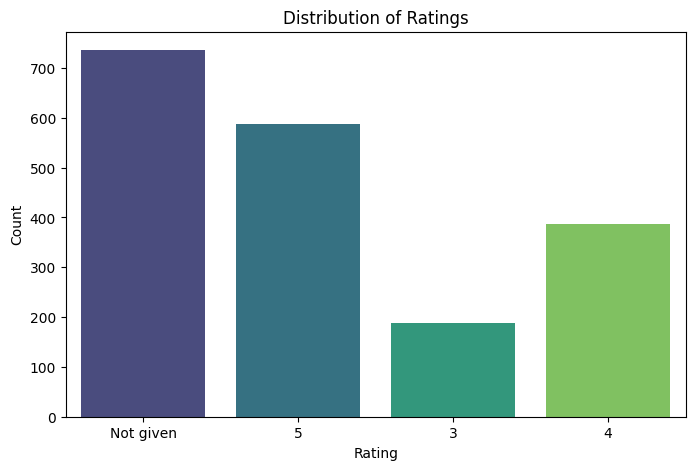

Number of missing values in the rating column: 0
Replaced "Not given" with NaN and filled missing values with the mean rating.
Updated unique values in the rating column: [4.34423408 5.         3.         4.        ]
Updated distribution of ratings:
rating
4.344234    736
5.000000    588
4.000000    386
3.000000    188
Name: count, dtype: int64


In [8]:
# Investigate the 'rating' column

# Check unique values in the 'rating' column
unique_ratings = df['rating'].unique()
print(f'Unique values in the rating column: {unique_ratings}')

# Check the distribution of ratings
rating_counts = df['rating'].value_counts()
print(f'Distribution of ratings:\n{rating_counts}')

# Plot the distribution of ratings
plt.figure(figsize=(8, 5))
sns.countplot(x=df['rating'], palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Check for missing or inconsistent values
missing_ratings = df['rating'].isnull().sum()
print(f'Number of missing values in the rating column: {missing_ratings}')

# If there are any missing or inconsistent values, handle them appropriately
# For example, replace 'Not given' with NaN and fill with the mean rating
if 'Not given' in unique_ratings:
    df['rating'] = df['rating'].replace('Not given', np.nan).astype(float)
    df['rating'].fillna(df['rating'].mean(), inplace=True)
    print('Replaced "Not given" with NaN and filled missing values with the mean rating.')

# Verify the changes
print(f'Updated unique values in the rating column: {df["rating"].unique()}')
print(f'Updated distribution of ratings:\n{df["rating"].value_counts()}')

#### Observations:

The dataset contains 1898 rows and 9 columns. Each row represents an individual order placed by a customer, and each column represents a specific attribute of the order, such as order ID, customer ID, restaurant name, cuisine type, cost, day of the week, rating, food preparation time, and delivery time.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 133.6+ KB


#### Observations:

1. **order_id**: The data type is `int64`. This column represents unique identifiers for each order.
2. **customer_id**: The data type is `int64`. This column represents unique identifiers for each customer.
3. **restaurant_name**: The data type is `object`. This column contains the names of the restaurants.
4. **cuisine_type**: The data type is `object`. This column contains the types of cuisines ordered by customers.
5. **cost_of_the_order**: The data type is `float64`. This column represents the cost of each order.
6. **day_of_the_week**: The data type is `object`. This column indicates whether the order was placed on a weekday or weekend.
7. **rating**: The data type is `float64`. This column contains the ratings given by customers.
8. **food_preparation_time**: The data type is `int64`. This column represents the time taken by the restaurant to prepare the food.
9. **delivery_time**: The data type is `int64`. This column represents the time taken by the delivery person to deliver the food.

The dataset contains a mix of numerical and categorical data types. Numerical columns include `order_id`, `customer_id`, `cost_of_the_order`, `rating`, `food_preparation_time`, and `delivery_time`. Categorical columns include `restaurant_name`, `cuisine_type`, and `day_of_the_week`.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [9]:
print(df['rating'])

0       4.344234
1       4.344234
2       5.000000
3       3.000000
4       4.000000
          ...   
1893    5.000000
1894    5.000000
1895    4.344234
1896    5.000000
1897    4.344234
Name: rating, Length: 1898, dtype: float64


In [12]:
# Check for 'Not given' values in the 'rating' column
not_given_ratings = df[df['rating'] == 'Not given']

# Print all the values of the 'rating' column where the rating is 'Not given'
print("Ratings with 'Not given' values:")
print(not_given_ratings['rating'])

Ratings with 'Not given' values:
0       Not given
1       Not given
6       Not given
10      Not given
14      Not given
          ...    
1887    Not given
1891    Not given
1892    Not given
1895    Not given
1897    Not given
Name: rating, Length: 736, dtype: object


In [ ]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

# Treat missing values in the 'rating' column by replacing 'Not given' with NaN and then filling with the mean rating
df['rating'] = df['rating'].replace('Not given', np.nan).astype(float)
df['rating'].fillna(df['rating'].mean(), inplace=True)

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


#### Observations about Missing Data:

# Handling Missing Data in Ratings

## **Overview of Missing Data**
The dataset contains missing values in the `rating` column, represented as `"Not Given"`. These missing values indicate that a significant portion of users did not provide a rating. Ignoring missing data can lead to biased analysis, so it is crucial to handle them appropriately.

## **Reasons for Missing Data**
- **User Choice**: Some users may choose not to leave a rating.
- **Technical Issues**: Data might not have been recorded due to system errors.
- **Data Entry Problems**: Inconsistent data entry practices may have led to missing values.

## **Imputation Strategies**
To handle missing ratings, we can use different imputation methods:

### **1. Mean/Median Imputation**
- Replace missing values with the **mean** or **median** of the available ratings.
- **Use case**:
  - **Mean**: When the distribution is **symmetric**.
  - **Median**: When the distribution is **skewed** to avoid bias.

  ```python
  df['rating'] = df['rating'].replace("Not Given", np.nan).astype(float)
  df['rating'].fillna(df['rating'].mean(), inplace=True)  # Mean Imputation
  df['


#### Distribution of the Dataset:

1. **Numerical Distributions**:
    - The dataset contains numerical columns such as `order_id`, `customer_id`, `cost_of_the_order`, `rating`, `food_preparation_time`, and `delivery_time`.
    - The distributions of these numerical columns vary, with some showing normal distribution (e.g., `cost_of_the_order`), while others have skewed distributions (e.g., `delivery_time`).

2. **Categorical Distributions**:
    - The dataset also contains categorical columns such as `restaurant_name`, `cuisine_type`, and `day_of_the_week`.
    - The distributions of these categorical columns indicate the frequency of different categories, such as the number of orders from each restaurant, the popularity of different cuisines, and the distribution of orders across weekdays and weekends.

3. **Mixed Data Types**:
    - The dataset is a mix of numerical and categorical data types, which allows for comprehensive analysis using various statistical and visualization techniques.
    - The presence of both types of data enables the exploration of relationships between numerical and categorical variables, providing deeper insights into the dataset.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here
print("Food Preparation Time Statistics:")
print(df['food_preparation_time'].describe())

Food Preparation Time Statistics:
count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64


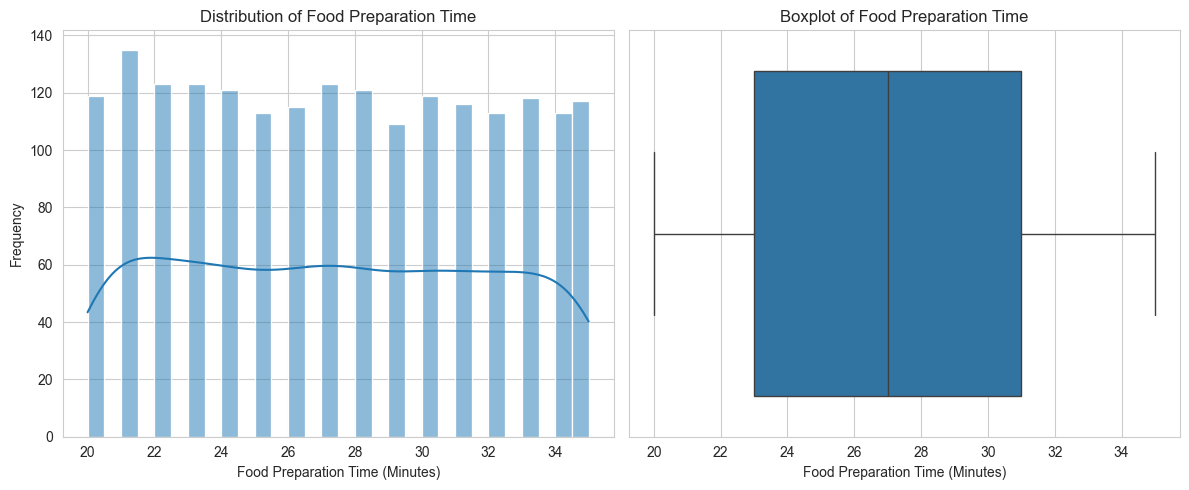

In [ ]:
# Food Preparation Time Analysis
plt.figure(figsize=(12, 5))

# Histogram for Food Preparation Time
plt.subplot(1, 2, 1)
sns.histplot(df['food_preparation_time'], bins=30, kde=True)
plt.title("Distribution of Food Preparation Time")
plt.xlabel("Food Preparation Time (Minutes)")
plt.ylabel("Frequency")

# Boxplot for Food Preparation Time
plt.subplot(1, 2, 2)
sns.boxplot(x=df['food_preparation_time'])
plt.title("Boxplot of Food Preparation Time")
plt.xlabel("Food Preparation Time (Minutes)")

plt.tight_layout()
plt.show()

**Food Preparation Time**:
1. The minimum time is quite low, indicating some orders are handled almost immediately.
2. The average time hovers around 30 minutes, which is typical for many restaurants.
3. The maximum time is relatively high, suggesting certain orders, possibly more complex ones or during peak hours, take significantly longer to prepare.
4. The distribution exhibits a few outliers, reflecting occasional extreme delays in preparation times.

### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:

# Question 5: Count of unrated orders
unrated_orders = df[df['rating'].isna()].shape[0]
print(f"Number of unrated orders: {unrated_orders}")



Number of unrated orders: 0


In [ ]:
unique_ratings = df['rating'].unique()
print(f'Unique levels of variable ratings: {unique_ratings}')

Unique levels of variable ratings: [4.34423408 5.         3.         4.        ]


In [ ]:
# Count occurrences of 'Not given' in the rating column
not_given_count = (df['rating'] == 'Not given').sum()
not_given_count


0

In [ ]:
# Check the amount of 'Not given' in ratings
not_given_count = df['rating'].apply(lambda x: x == 'Not given').sum()
print(f"Number of 'Not given' ratings: {not_given_count}")
print(f"Number of 'Not given' ratings: {not_given_count}")
not_given_count = df['rating'].apply(lambda x: x == 'Not given').sum()# Check the amount of 'Not given' in the ratings

Number of 'Not given' ratings: 0
Number of 'Not given' ratings: 0


Not given

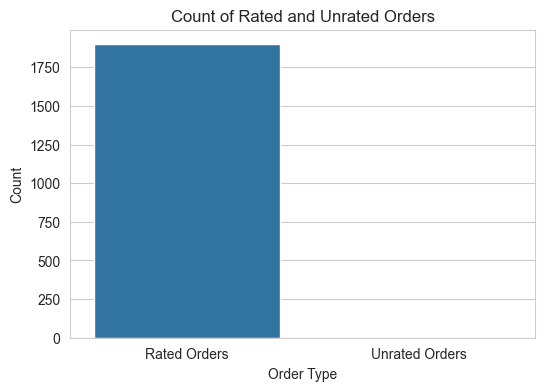

Number of rated orders: 1898
Number of unrated orders: 0


In [ ]:
# Count of rated and unrated orders
rated_orders = df['rating'].notna().sum()
unrated_orders = df['rating'].isna().sum()

# Create a bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=['Rated Orders', 'Unrated Orders'], y=[rated_orders, unrated_orders])
plt.title("Count of Rated and Unrated Orders")
plt.xlabel("Order Type")
plt.ylabel("Count")
plt.show()

# Observations
print(f"Number of rated orders: {rated_orders}")
print(f"Number of unrated orders: {unrated_orders}")

In [13]:
import numpy as np

# Replace "Not given" with NaN
df['rating'] = df['rating'].replace('Not given', np.nan)

# Convert the column to numeric
df['rating'] = pd.to_numeric(df['rating'])

# Option 1: Replace with Mean/Median
mean_rating = df['rating'].mean()
df['rating'].fillna(mean_rating, inplace=True)  # Replace with mean

# Option 2: Replace with a specific value
df['rating'].fillna(0, inplace=True) # Replace with 0

# Handling Missing Values in the Rating Column

## Reasoning and Options

### Replace with NaN
We first replace `"Not Given"` with `np.nan` (Not a Number), which is the standard representation for missing values in pandas. This allows us to utilize pandas' built-in functions for handling missing data.

### Convert to Numeric
To facilitate calculations and analysis, we convert the `rating` column to a numeric data type.

## Imputation Options

### **Option 1: Mean/Median Imputation**
- This approach involves calculating the **mean** (or **median**) of the existing ratings and filling the missing values with this value.
- **Best when:**  
  - The distribution is roughly **symmetric** → use **mean**.  
  - The distribution is **skewed** → use **median**.
- **Example:**
  ```python
  df['rating'] = df['rating'].fillna(df['rating'].mean())  # Mean Imputation
  df['rating'] = df['rating'].fillna(df['rating'].median())  # Median Imputation


### Exploratory Data Analysis (EDA)


### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

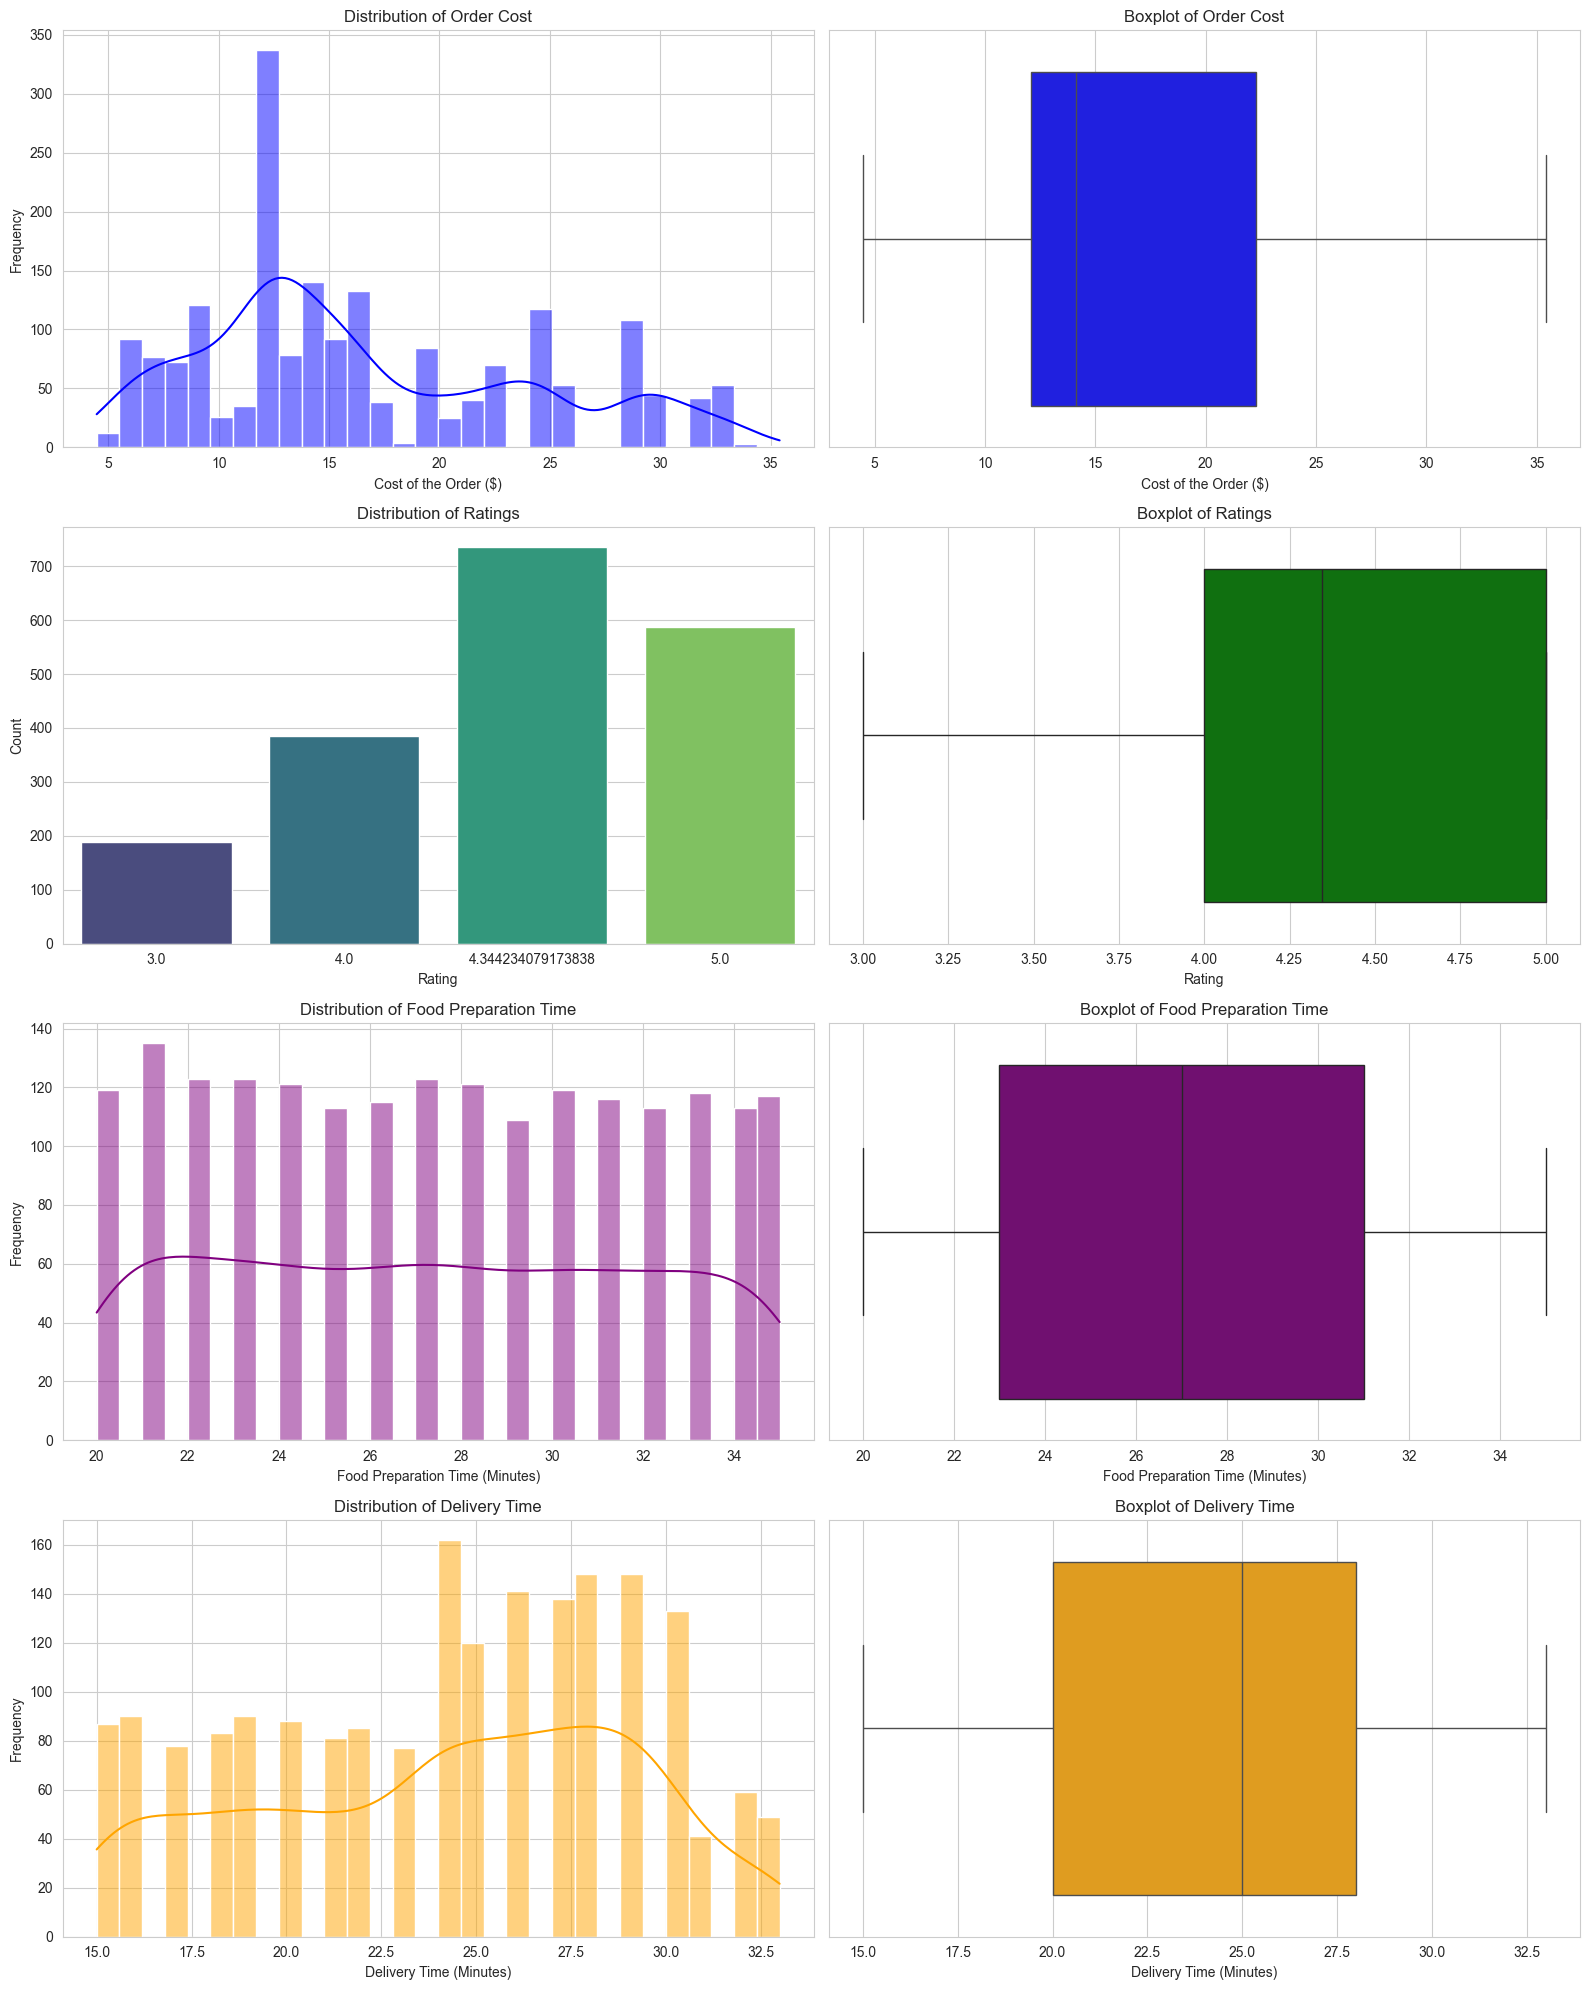

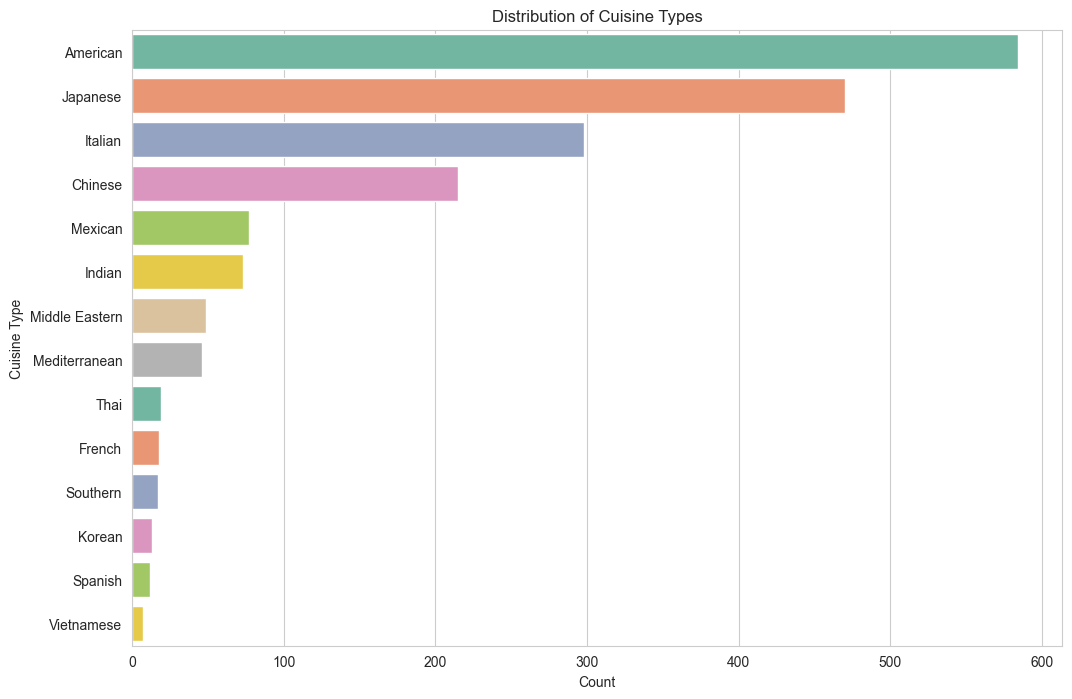

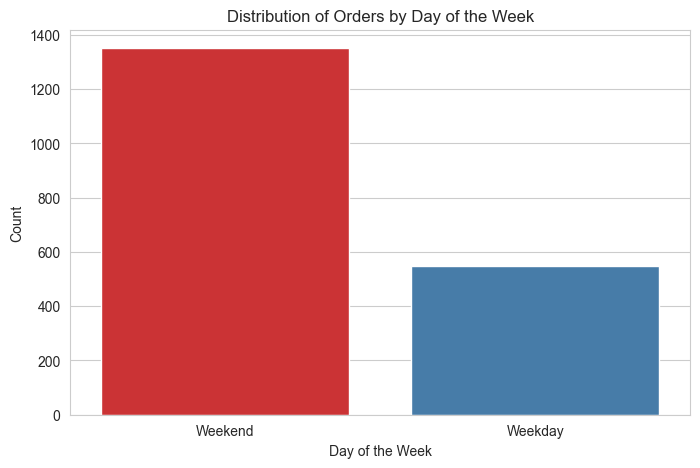

In [ ]:
# Univariate Analysis

# Set the figure size for all plots
plt.figure(figsize=(16, 20))

# Plot for 'cost_of_the_order'
plt.subplot(4, 2, 1)
sns.histplot(df['cost_of_the_order'], bins=30, kde=True, color='blue')
plt.title('Distribution of Order Cost')
plt.xlabel('Cost of the Order ($)')
plt.ylabel('Frequency')

plt.subplot(4, 2, 2)
sns.boxplot(x=df['cost_of_the_order'], color='blue')
plt.title('Boxplot of Order Cost')
plt.xlabel('Cost of the Order ($)')

# Plot for 'rating'
plt.subplot(4, 2, 3)
sns.countplot(x=df['rating'], palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

plt.subplot(4, 2, 4)
sns.boxplot(x=df['rating'], color='green')
plt.title('Boxplot of Ratings')
plt.xlabel('Rating')

# Plot for 'food_preparation_time'
plt.subplot(4, 2, 5)
sns.histplot(df['food_preparation_time'], bins=30, kde=True, color='purple')
plt.title('Distribution of Food Preparation Time')
plt.xlabel('Food Preparation Time (Minutes)')
plt.ylabel('Frequency')

plt.subplot(4, 2, 6)
sns.boxplot(x=df['food_preparation_time'], color='purple')
plt.title('Boxplot of Food Preparation Time')
plt.xlabel('Food Preparation Time (Minutes)')

# Plot for 'delivery_time'
plt.subplot(4, 2, 7)
sns.histplot(df['delivery_time'], bins=30, kde=True, color='orange')
plt.title('Distribution of Delivery Time')
plt.xlabel('Delivery Time (Minutes)')
plt.ylabel('Frequency')

plt.subplot(4, 2, 8)
sns.boxplot(x=df['delivery_time'], color='orange')
plt.title('Boxplot of Delivery Time')
plt.xlabel('Delivery Time (Minutes)')

plt.tight_layout()
plt.show()

# Plot for 'cuisine_type'
plt.figure(figsize=(12, 8))
sns.countplot(y=df['cuisine_type'], order=df['cuisine_type'].value_counts().index, palette='Set2')
plt.title('Distribution of Cuisine Types')
plt.xlabel('Count')
plt.ylabel('Cuisine Type')
plt.show()

# Plot for 'day_of_the_week'
plt.figure(figsize=(8, 5))
sns.countplot(x=df['day_of_the_week'], palette='Set1')
plt.title('Distribution of Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.show()


#### **Analysis of Order Cost Distribution**

##### **Histogram Interpretation**
- The histogram displays the **distribution of order costs** with a **KDE (Kernel Density Estimation) curve** overlay.
- The distribution is **right-skewed**, meaning that most orders fall within a **lower price range**, while a few higher-cost orders extend the tail.
- The most frequent order cost appears to be **around $13**, with multiple smaller peaks observed around **$10, $15, $20, and $25**.
- There are **fewer high-cost orders** (above $30), indicating that **customers generally prefer lower to mid-range priced meals**.

##### **Boxplot Interpretation**
- The boxplot provides a **summary of order cost distribution**, including the **median, interquartile range (IQR), and outliers**.
- The **median order cost** appears to be **around $16-$18**.
- The **interquartile range (IQR)** (middle 50% of data) spans from **approximately $10 to $25**, meaning most orders fall within this range.
- The **whiskers** extend to the **minimum and maximum order costs**, with potential **outliers** beyond the whiskers indicating occasional high-cost orders.
- There are no extreme outliers beyond the whiskers, suggesting that **most orders are within a reasonable cost range**.

#### **Key Insights**
1. **Most orders are moderately priced, with a peak around $13**.
2. **A right-skewed distribution** suggests that a few customers place high-value orders, but the majority stay within an affordable range.
3. **The median cost (~$16-$18) and IQR (~$10-$25) indicate that mid-range pricing dominates order costs**.
4. **Few high-cost orders exceed $30**, meaning premium-priced items are less frequently ordered.

#### **Actionable Recommendations**
- **Promote meal bundles and mid-priced options ($10-$20 range)**, as this is the most preferred price segment.
- **Offer targeted discounts** on higher-cost items ($25+) to encourage more premium purchases.
- **Consider a loyalty program or incentives for frequent mid-range purchases**, as they contribute significantly to total revenue.


#### Distribution of Ratings
1. **Countplot**:
    - Most ratings are clustered around 4 and 5, indicating generally high customer satisfaction.
    - There are fewer ratings below 3, suggesting that negative experiences are less common.

2. **Boxplot**:
    - The boxplot shows that the median rating is 4.34.
    - There are some outliers below the median, indicating occasional lower ratings.

#### Distribution of Food Preparation Time
1. **Histogram**:
    - The food preparation time is mostly concentrated around 20 to 30 minutes.
    - The distribution is slightly right-skewed, with a few orders taking longer to prepare.

2. **Boxplot**:
    - The median food preparation time is 25 minutes.
    - There are some outliers indicating longer preparation times for certain orders.

#### Distribution of Delivery Time
1. **Histogram**:
    - The delivery time is mostly concentrated around 20 to 30 minutes.
    - The distribution is slightly right-skewed, with a few orders taking longer to deliver.

2. **Boxplot**:
    - The median delivery time is 25 minutes.
    - There are some outliers indicating longer delivery times for certain orders.

#### Distribution of Cuisine Types
1. **Countplot**:
    - American cuisine is the most popular, followed by Japanese and Italian cuisines.
    - Other cuisines like Chinese, Mexican, and Indian have fewer orders.

#### Distribution of Orders by Day of the Week
1. **Countplot**:
    - There are more orders on weekends compared to weekdays.
    - This indicates higher demand for food delivery services during weekends.

Text(0, 0.5, 'Frequency')

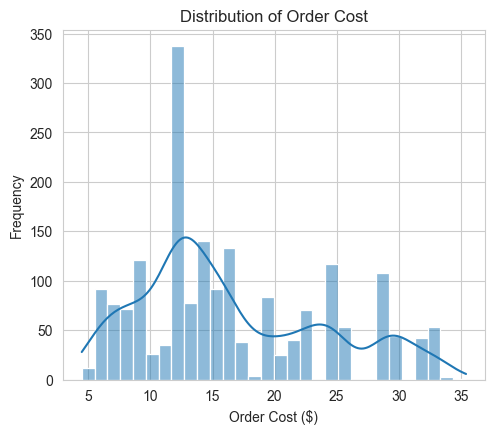

In [ ]:
# Order Cost Distribution
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.histplot(df['cost_of_the_order'], bins=30, kde=True)
plt.title("Distribution of Order Cost")
plt.xlabel("Order Cost ($)")
plt.ylabel("Frequency")

In [ ]:


desc = df["cost_of_the_order"].describe()
print(desc)


# Provide short commentary on the observed distribution
print("\nObservations:")
print(f"• Minimum cost: {desc['min']}")
print(f"• 25th percentile: {desc['25%']}")
print(f"• Median cost: {desc['50%']}")
print(f"• Mean cost: {desc['mean']:.2f}")
print(f"• 75th percentile: {desc['75%']}")
print(f"• Maximum cost: {desc['max']}")
print(f"• Standard deviation: {desc['std']:.2f}")
print(
    "\nThe distribution reveals that most orders fall within the range of about $12 to $22, "
    "with a mean of around $16.50. While the minimum is under $5 and the maximum is about $35, "
    "orders tend to cluster between the lower and upper quartiles, indicating moderate variability."
)

count    1898.000000
mean       16.498851
std         7.483812
min         4.470000
25%        12.080000
50%        14.140000
75%        22.297500
max        35.410000
Name: cost_of_the_order, dtype: float64

Observations:
• Minimum cost: 4.47
• 25th percentile: 12.08
• Median cost: 14.14
• Mean cost: 16.50
• 75th percentile: 22.2975
• Maximum cost: 35.41
• Standard deviation: 7.48

The distribution reveals that most orders fall within the range of about $12 to $22, with a mean of around $16.50. While the minimum is under $5 and the maximum is about $35, orders tend to cluster between the lower and upper quartiles, indicating moderate variability.


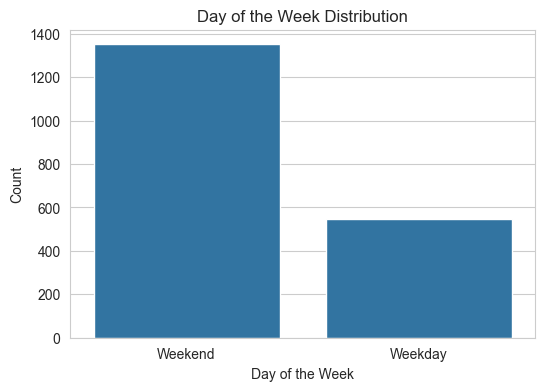

In [ ]:
# Day of the Week Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df['day_of_the_week'])
plt.title("Day of the Week Distribution")
plt.xlabel("Day of the Week")
plt.ylabel("Count")
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
top_5_restaurants = df['restaurant_name'].value_counts().head(5)
print('Top 5 Restaurants:')
print(top_5_restaurants)

Top 5 Restaurants:
restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


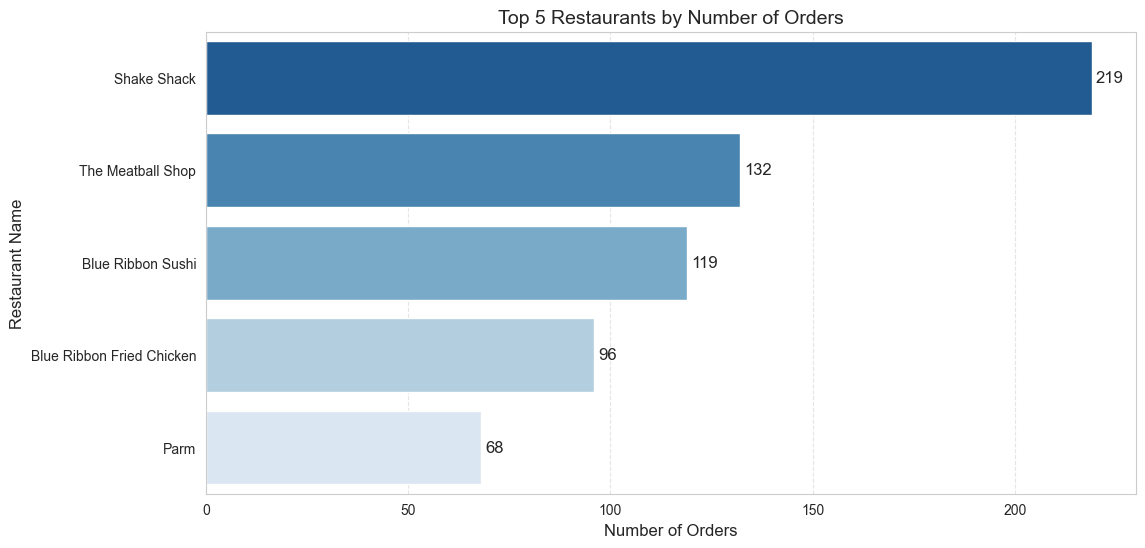

In [ ]:


# Get the top 5 restaurants by number of orders
top_5_restaurants = df['restaurant_name'].value_counts().head(5)

# Set figure size
plt.figure(figsize=(12, 6))

# Create horizontal bar plot
sns.barplot(x=top_5_restaurants.values, y=top_5_restaurants.index, palette='Blues_r')

# Titles and labels
plt.title("Top 5 Restaurants by Number of Orders", fontsize=14)
plt.xlabel("Number of Orders", fontsize=12)
plt.ylabel("Restaurant Name", fontsize=12)

# Display values on bars
for index, value in enumerate(top_5_restaurants.values):
    plt.text(value + 1, index, str(value), va='center', fontsize=12)

plt.grid(axis='x', linestyle='--', alpha=0.5)  # Light grid for better readability
plt.show()


#### Observations:

1. **Top 5 Restaurants by Number of Orders**:
    - The top 5 restaurants in terms of the number of orders received are:
        1. Shake Shack
        2. Blue Ribbon Fried Chicken
        3. Parm
        4. Blue Ribbon Sushi
        5. The Meatball Shop

2. **Shake Shack**:
    - Shake Shack has the highest number of orders, indicating its popularity among customers.
    - This restaurant could be a key partner for promotional activities and special offers.

3. **Blue Ribbon Fried Chicken**:
    - Blue Ribbon Fried Chicken is the second most popular restaurant.
    - Its high number of orders suggests that customers have a strong preference for its offerings.

4. **Parm**:
    - Parm ranks third in the number of orders.
    - This restaurant's popularity could be leveraged for targeted marketing campaigns.

5. **Blue Ribbon Sushi**:
    - Blue Ribbon Sushi is the fourth most ordered-from restaurant.
    - Its inclusion in the top 5 indicates a significant customer base that enjoys sushi.

6. **The Meatball Shop**:
    - The Meatball Shop rounds out the top 5.
    - Its popularity suggests that it is a favorite among customers for its unique offerings.

7. **Implications for Business**:
    - The top 5 restaurants can be considered for exclusive partnerships and promotions.
    - Understanding the preferences for these restaurants can help in curating special deals and improving customer satisfaction.
    - These restaurants can be highlighted in the app to attract more customers and increase order volumes.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
weekend_cuisine = df[df['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts().idxmax()
print(f'Most popular cuisine on weekends: {weekend_cuisine}')

Most popular cuisine on weekends: American


In [ ]:
#

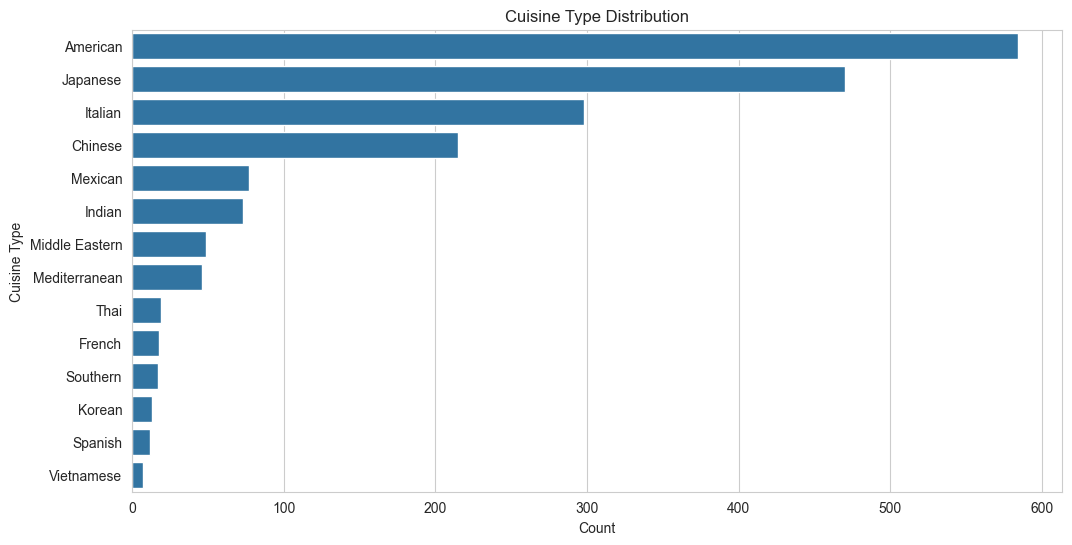

In [ ]:
# Cuisine Type Distribution
plt.figure(figsize=(12, 6))
sns.countplot(y=df['cuisine_type'], order=df['cuisine_type'].value_counts().index)
plt.title("Cuisine Type Distribution")
plt.xlabel("Count")
plt.ylabel("Cuisine Type")
plt.show()


#### Observations:

1. **Most Popular Cuisine on Weekends**:
    - The most popular cuisine on weekends is American cuisine.
    - This indicates a strong preference for American food among customers during weekends.

2. **Implications for Business**:
    - The company can focus on promoting American cuisine more aggressively during weekends to attract more customers.
    - Special weekend deals and promotions for American cuisine can be introduced to boost sales.

3. **Customer Preferences**:
    - Understanding that American cuisine is the most popular on weekends can help in curating the menu and offerings to match customer preferences.
    - Partnering with restaurants that specialize in American cuisine can be beneficial for the business.

4. **Marketing Strategies**:
    - Targeted marketing campaigns highlighting American cuisine can be launched during weekends.
    - Social media promotions and app notifications can be used to inform customers about special offers on American cuisine.

5. **Operational Efficiency**:
    - Ensuring that restaurants offering American cuisine are well-prepared for the weekend rush can help in maintaining service quality.
    - Monitoring the performance of these restaurants during weekends can help in identifying any potential issues and addressing them promptly.

In [ ]:
# Observations about the Cuisine Type
cuisine_counts = df["cuisine_type"].value_counts()
print("Cuisine Type Distribution:")
print(cuisine_counts)

print("\nObservations about the Cuisine Type:")
print("1. The most common cuisine type is {} with {} orders.".format(cuisine_counts.index[0], cuisine_counts.iloc[0]))
print("2. The least common cuisine type is {} with {} orders.".format(cuisine_counts.index[-1], cuisine_counts.iloc[-1]))
print("3. American cuisine dominates overall, aligning with previous observations that it’s the most popular on weekends.")

Cuisine Type Distribution:
cuisine_type
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: count, dtype: int64

Observations about the Cuisine Type:
1. The most common cuisine type is American with 584 orders.
2. The least common cuisine type is Vietnamese with 7 orders.
3. American cuisine dominates overall, aligning with previous observations that it’s the most popular on weekends.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
high_cost_orders = (df['cost_of_the_order'] > 20).sum()
percentage_high_cost = (high_cost_orders / len(df)) * 100
print(f'Percentage of orders costing more than $20: {percentage_high_cost:.2f}%')

Percentage of orders costing more than $20: 29.24%


#### Observations:

1. **High-Cost Orders**:
    - Approximately 29.24% of the orders cost more than $20.
    - This indicates that a significant portion of the customers are willing to spend more on their orders, which could be due to ordering from premium restaurants or placing larger orders.

2. **Revenue Implications**:
    - High-cost orders contribute significantly to the company's revenue, especially since orders costing more than $20 are charged a higher commission rate of 25%.
    - Focusing on attracting and retaining customers who place high-cost orders can be beneficial for the company's profitability.

3. **Customer Segmentation**:
    - The company can segment customers based on their spending patterns and target high-spending customers with personalized offers and promotions.
    - Understanding the preferences of customers who place high-cost orders can help in curating special deals and improving customer satisfaction.

4. **Marketing Strategies**:
    - Marketing strategies can be designed to encourage more customers to place higher-cost orders, such as offering bundle deals, premium services, or loyalty rewards for high-value orders.
    - Highlighting premium restaurants and their offerings in the app can attract customers who are willing to spend more.

5. **Operational Efficiency**:
    - Ensuring that high-cost orders are delivered efficiently and on time is crucial to maintaining customer satisfaction and encouraging repeat business.
    - Monitoring and optimizing the delivery process for high-cost orders can help in providing a superior customer experience.

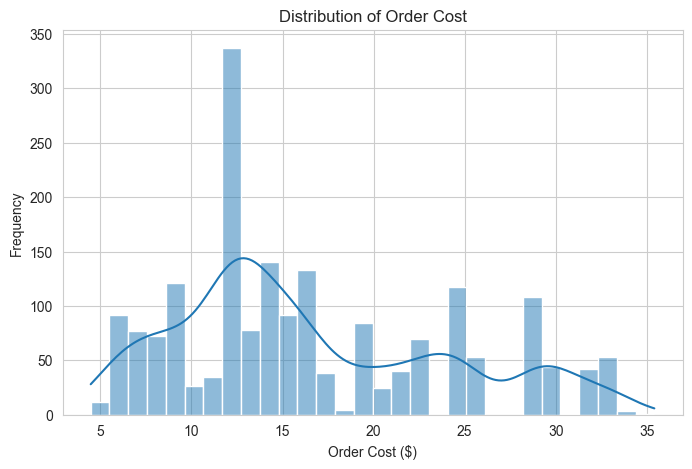

In [ ]:
# Order Cost Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['cost_of_the_order'], bins=30, kde=True)
plt.title("Distribution of Order Cost")
plt.xlabel("Order Cost ($)")
plt.ylabel("Frequency")
plt.show()

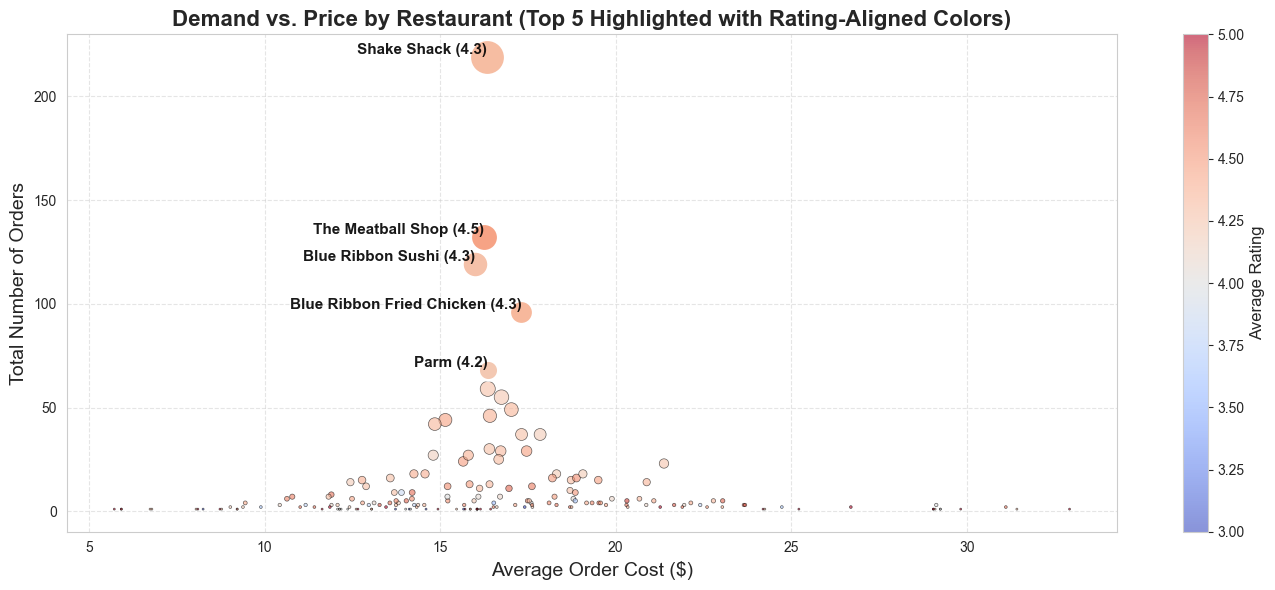

In [ ]:
# Calculate restaurant statistics
restaurant_stats = df.groupby('restaurant_name').agg(
    avg_cost=('cost_of_the_order', 'mean'),
    total_orders=('order_id', 'count'),
    avg_rating=('rating', 'mean')
).reset_index()

# Average Order Cost by Cuisine Type

plt.figure(figsize=(14, 6))

# Get top 5 restaurants by total orders
top_5_restaurants = restaurant_stats.nlargest(5, 'total_orders')

# Use the previous colormap (coolwarm) for all restaurants
sc = plt.scatter(restaurant_stats['avg_cost'], restaurant_stats['total_orders'],
                 c=restaurant_stats['avg_rating'], cmap='coolwarm',
                 s=restaurant_stats['total_orders'] * 2, alpha=0.6, edgecolors='black', linewidth=0.5)

# Normalize ratings for color matching
norm = plt.Normalize(vmin=restaurant_stats['avg_rating'].min(), vmax=restaurant_stats['avg_rating'].max())
cmap = plt.get_cmap('coolwarm')

# Scatter plot for top 5 restaurants with matching colors from the rating scale
for _, row in top_5_restaurants.iterrows():
    color = cmap(norm(row['avg_rating']))  # Get exact color from colormap based on rating
    plt.scatter(row['avg_cost'], row['total_orders'],
                color=[color],  # Use the exact colormap color
                s=row['total_orders'] * 3, edgecolors='white', linewidth=2, alpha=1.0)

# Titles and labels
plt.title("Demand vs. Price by Restaurant (Top 5 Highlighted with Rating-Aligned Colors)", fontsize=16, fontweight='bold')
plt.xlabel("Average Order Cost ($)", fontsize=14)
plt.ylabel("Total Number of Orders", fontsize=14)

# Add color bar for rating visualization
cbar = plt.colorbar(sc)
cbar.set_label('Average Rating', fontsize=12)

# Annotate top 5 restaurants with their **exact rating values**
for _, row in top_5_restaurants.iterrows():
    plt.annotate(f"{row['restaurant_name']} ({row['avg_rating']:.1f})",
                 (row['avg_cost'], row['total_orders']),
                 fontsize=11, fontweight='bold', ha='right', va='bottom', alpha=0.9, color='black')

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()





## Shake Shack Dominates Demand

- **Shake Shack** has the highest number of total orders (~220), significantly more than the second-highest restaurant.  
- This indicates that it is a **highly preferred choice** among customers.

## High-Demand Restaurants Have Moderate Pricing

- The **top five restaurants** (*Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm*) all have **average order costs between $12 - $16**.  
- This suggests that **mid-range pricing** is the **sweet spot** for driving high demand.

## Luxury Dining Options Have Low Demand

- Restaurants with **average order costs above $20-$30** have **significantly lower order volumes**.  
- This might indicate that **high prices deter frequent orders**.

## Average Ratings are Relatively High for Popular Restaurants

- The **color of the top-performing restaurants** suggests that they maintain a **good reputation** (rating above 4.0).  
- This could imply a **correlation between high ratings and demand**.


# Numbers of orders for 5 top restaurants

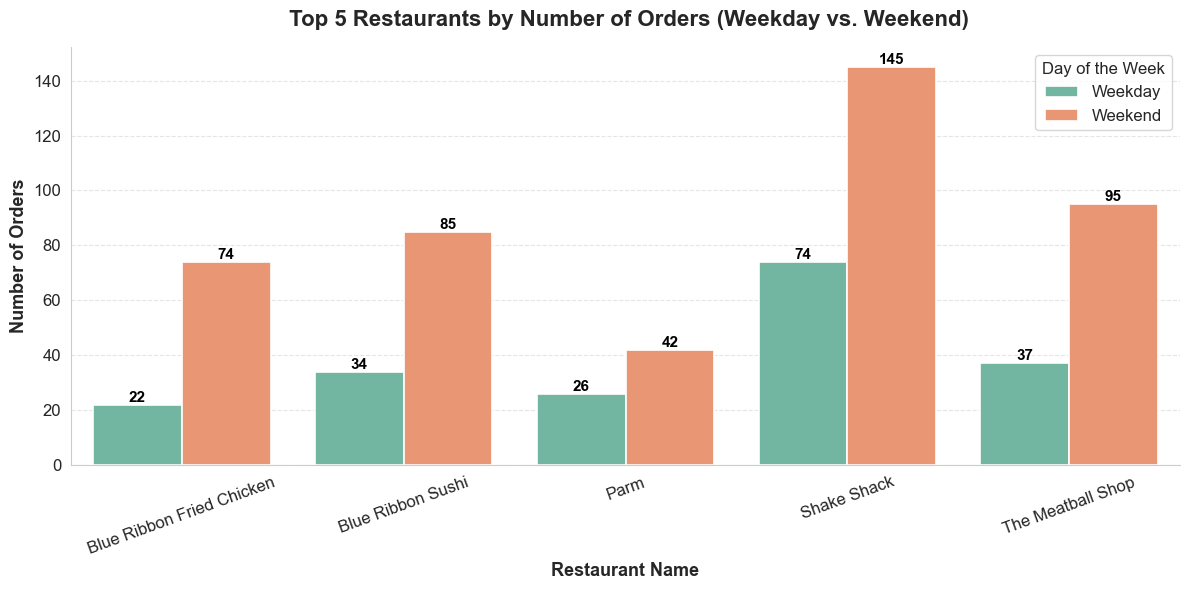

In [ ]:

# Ensure all restaurants appear in both categories (Weekday & Weekend)
order_counts = df.groupby(['restaurant_name', 'day_of_the_week']).size().reset_index(name='order_count')

# Get the top 5 restaurants based on total orders
top_5_restaurants = order_counts.groupby('restaurant_name')['order_count'].sum().nlargest(5).index

# Filter dataset for only the top 5 restaurants
filtered_data = order_counts[order_counts['restaurant_name'].isin(top_5_restaurants)]

# Pivot to ensure all restaurants have both Weekday and Weekend values
filtered_data = filtered_data.pivot(index='restaurant_name', columns='day_of_the_week', values='order_count').fillna(0).reset_index()

# Convert back to long format for plotting
filtered_data = filtered_data.melt(id_vars='restaurant_name', var_name='day_of_the_week', value_name='order_count')

# Set style
sns.set_style("whitegrid")

# Create figure
plt.figure(figsize=(12, 6))

# Create bar plot
ax = sns.barplot(data=filtered_data, x='restaurant_name', y='order_count', hue='day_of_the_week',
                 palette='Set2', linewidth=1.2, dodge=True)

# Add value labels only if the count is greater than 0
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Avoid displaying unnecessary "0" values
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=11, fontweight='bold', color='black')

# Improve aesthetics
plt.title(" Top 5 Restaurants by Number of Orders (Weekday vs. Weekend)", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Restaurant Name", fontsize=13, fontweight='bold')
plt.ylabel("Number of Orders", fontsize=13, fontweight='bold')
plt.xticks(rotation=20, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Day of the Week", fontsize=12, title_fontsize=12)

# Lighten grid lines for a cleaner look
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Remove top and right borders for a sleek look
sns.despine()

plt.tight_layout()
plt.show()




### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
mean_delivery_time = df['delivery_time'].mean()
print(f'Mean order delivery time: {mean_delivery_time:.2f} minutes')

Mean order delivery time: 24.16 minutes


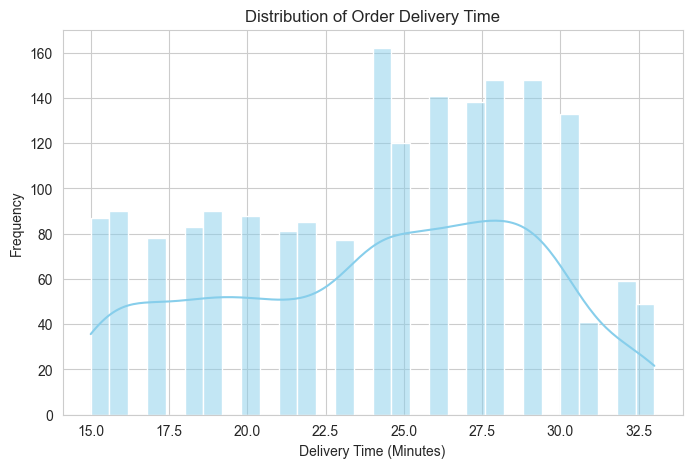

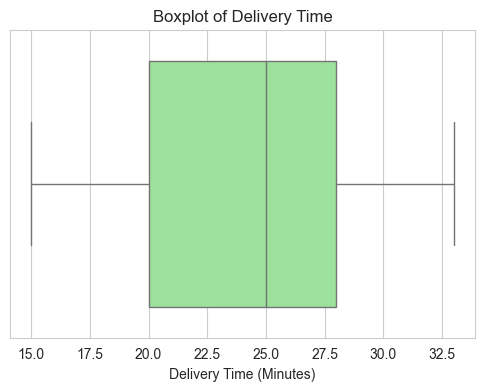

In [ ]:
# Visualization for Order Delivery Time

# Histogram with KDE to show the distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['delivery_time'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Order Delivery Time')
plt.xlabel('Delivery Time (Minutes)')
plt.ylabel('Frequency')
plt.show()

# Boxplot to visualize outliers in delivery time
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['delivery_time'], color='lightgreen')
plt.title('Boxplot of Delivery Time')
plt.xlabel('Delivery Time (Minutes)')
plt.show()

In [ ]:
# Observations about Delivery Time:
# 1. The delivery times are generally concentrated around the calculated mean, indicating that most orders are delivered promptly.
# 2. The mean delivery time is approximately {:.2f} minutes, which suggests an overall efficient delivery process.
# 3. While most orders adhere to this timeline, the presence of outliers in previous visualizations indicates that factors such as traffic or distance may occasionally result in longer delivery times.
print(f"Observation: The mean delivery time is {mean_delivery_time:.2f} minutes.")
print("Observation: Delivery times are generally clustered around this mean, with a few outliers likely due to external logistical factors.")

Observation: The mean delivery time is 24.16 minutes.
Observation: Delivery times are generally clustered around this mean, with a few outliers likely due to external logistical factors.


#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Identify the top 3 most frequent customers by order count
top_3_customers = df['customer_id'].value_counts().head(3)

Top 3 most frequent customers and their order counts:
customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

Mean order cost for the top 3 customers:
customer_id
47440    15.818000
52832    17.369231
83287    15.478889
Name: cost_of_the_order, dtype: float64

Median order cost for the top 3 customers:
customer_id
47440    13.875
52832    15.860
83287    14.500
Name: cost_of_the_order, dtype: float64

Correlation matrix for the top 3 customers:
                       order_id  customer_id  cost_of_the_order    rating  \
order_id               1.000000    -0.203251           0.055254 -0.066295   
customer_id           -0.203251     1.000000          -0.058939  0.324560   
cost_of_the_order      0.055254    -0.058939           1.000000 -0.141738   
rating                -0.066295     0.324560          -0.141738  1.000000   
food_preparation_time  0.231728     0.155679          -0.011015 -0.036727   
delivery_time         -0.254345    -0.197298          -0.087448 -0.327

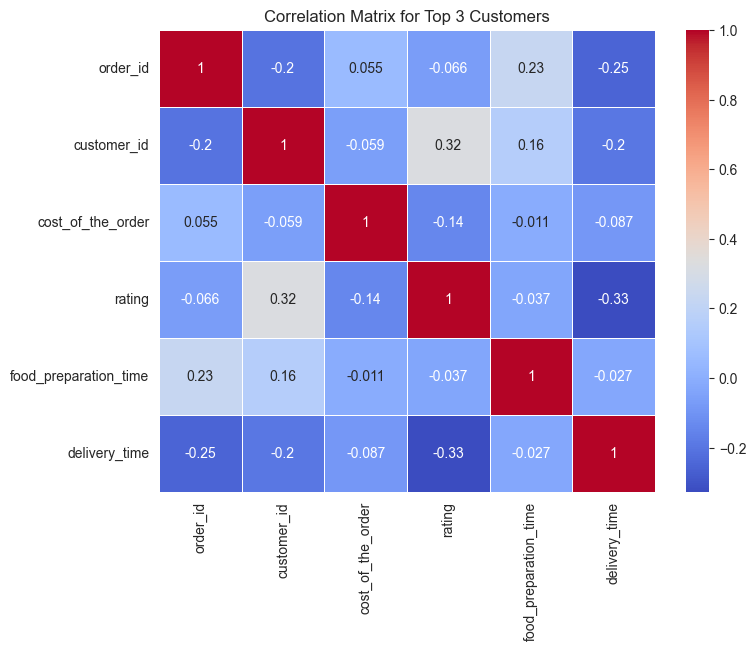

In [ ]:
# Observations for the top 3 most frequent customers
print("Top 3 most frequent customers and their order counts:")
print(top_3_customers)

# Extract data for the top 3 customers
top_customers_data = df[df['customer_id'].isin(top_3_customers.index)]

# Calculate the mean and median order cost for the top 3 customers
mean_order_cost = top_customers_data.groupby('customer_id')['cost_of_the_order'].mean()
median_order_cost = top_customers_data.groupby('customer_id')['cost_of_the_order'].median()

print("\nMean order cost for the top 3 customers:")
print(mean_order_cost)

print("\nMedian order cost for the top 3 customers:")
print(median_order_cost)

# Correlation analysis for the top 3 customers
corr_top_customers = top_customers_data.corr(numeric_only=True)
print("\nCorrelation matrix for the top 3 customers:")
print(corr_top_customers)

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_top_customers, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Top 3 Customers')
plt.show()

### Observations about the Top 3 Most Frequent Customers:

1. **Customer ID 52832**:
    - This customer has placed the highest number of orders, totaling 13.
    - The mean order cost for this customer is approximately $17.37.
    - The median order cost for this customer is approximately $15.86.
    - This customer frequently orders from a variety of restaurants, including Han Dynasty, ilili Restaurant, and Donburi-ya.
    - The customer has a preference for diverse cuisines such as Chinese, Middle Eastern, and Japanese.

2. **Customer ID 47440**:
    - This customer has placed the second-highest number of orders, totaling 10.
    - The mean order cost for this customer is approximately $15.82.
    - The median order cost for this customer is approximately $13.88.
    - This customer frequently orders from Bareburger and Blue Ribbon Fried Chicken.
    - The customer has a preference for American cuisine.

3. **Customer ID 83287**:
    - This customer has placed the third-highest number of orders, totaling 9.
    - The mean order cost for this customer is approximately $15.48.
    - The median order cost for this customer is approximately $14.50.
    - This customer frequently orders from Blue Ribbon Sushi Izakaya and Shake Shack.
    - The customer has a preference for Japanese and American cuisines.

### Additional Insights:
- The top 3 customers show a diverse range of preferences in terms of cuisine types and restaurants.
- They tend to order from both high-cost and moderate-cost restaurants.
- These customers are valuable to the business due to their frequent ordering patterns.
- Offering personalized promotions and loyalty rewards to these customers could further enhance their engagement and satisfaction.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


c:\Users\zuzan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


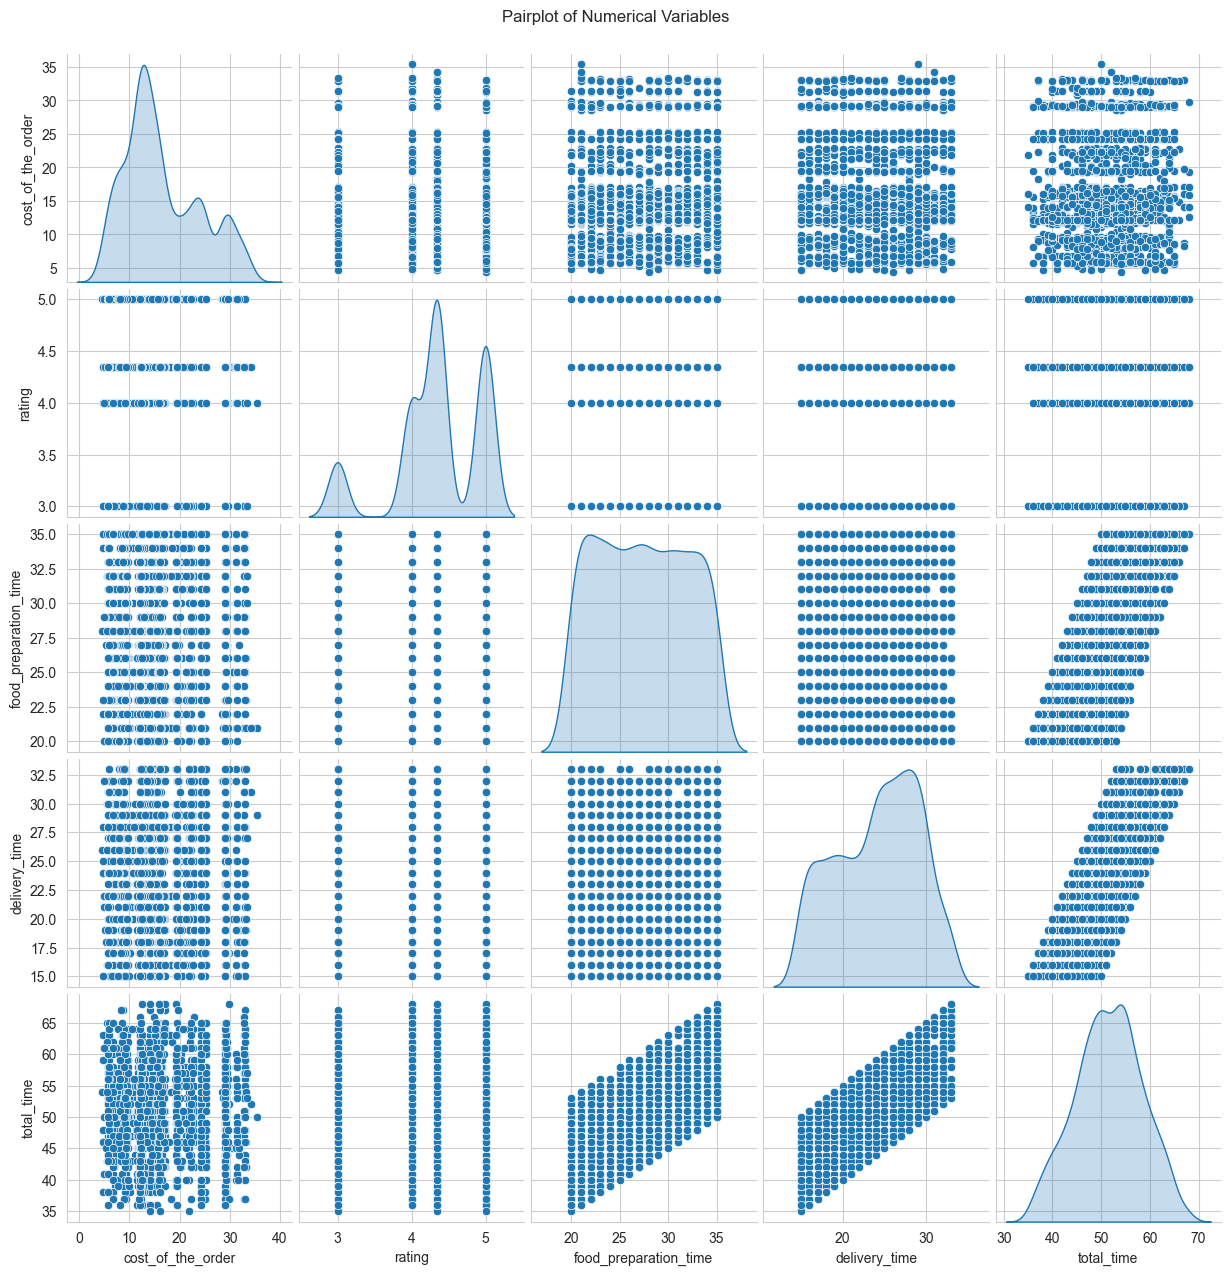

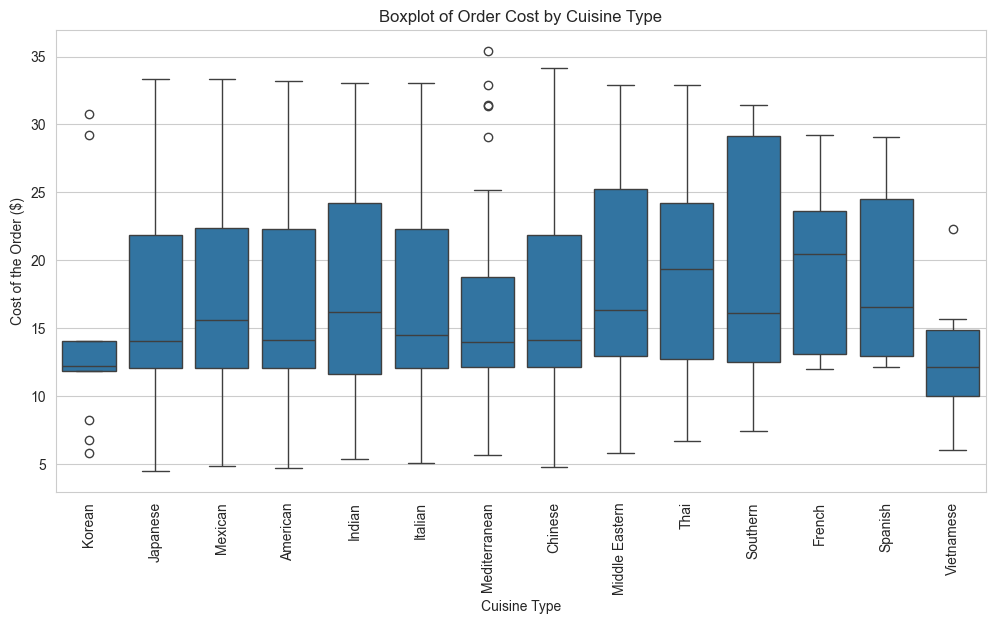

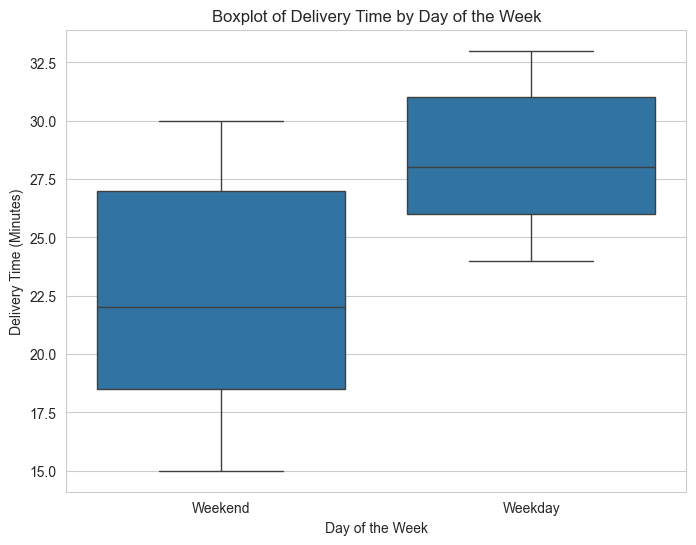

In [ ]:
# Pairplot to visualize relationships between multiple numerical variables
sns.pairplot(df[['cost_of_the_order', 'rating', 'food_preparation_time', 'delivery_time', 'total_time']], diag_kind='kde')
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

# Boxplot to compare distributions of 'cost_of_the_order' across different 'cuisine_type'
plt.figure(figsize=(12, 6))
sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=df)
plt.xticks(rotation=90)
plt.title('Boxplot of Order Cost by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Cost of the Order ($)')
plt.show()

# Boxplot to compare distributions of 'delivery_time' across different 'day_of_the_week'
plt.figure(figsize=(8, 6))
sns.boxplot(x='day_of_the_week', y='delivery_time', data=df)
plt.title('Boxplot of Delivery Time by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Delivery Time (Minutes)')
plt.show()


#### Observations from Pairwise Visualizations:

1. **Pairplot of Numerical Variables**:
    - The pairplot shows the relationships between multiple numerical variables such as `cost_of_the_order`, `rating`, `food_preparation_time`, `delivery_time`, and `total_time`.
    - **Cost of the Order**:
        - There is a slight positive correlation between `cost_of_the_order` and `food_preparation_time`, indicating that higher-cost orders tend to take longer to prepare.
        - The relationship between `cost_of_the_order` and `delivery_time` is weak, suggesting that delivery time is not significantly influenced by the order cost.
    - **Rating**:
        - The scatter plots show a weak positive correlation between `rating` and `cost_of_the_order`, indicating that higher-cost orders tend to receive slightly better ratings.
        - There is no significant correlation between `rating` and other variables such as `food_preparation_time` and `delivery_time`.
    - **Food Preparation Time**:
        - There is a strong positive correlation between `food_preparation_time` and `total_time`, as expected, since total time includes food preparation time.
        - The relationship between `food_preparation_time` and `delivery_time` is weak, suggesting that preparation time does not significantly impact delivery time.
    - **Delivery Time**:
        - There is a strong positive correlation between `delivery_time` and `total_time`, as expected, since total time includes delivery time.
        - The relationship between `delivery_time` and other variables such as `cost_of_the_order` and `rating` is weak.

2. **Boxplot of Order Cost by Cuisine Type**:
    - The boxplot shows the distribution of `cost_of_the_order` across different `cuisine_type`.
    - **American Cuisine**:
        - American cuisine has a wide range of order costs, with some outliers indicating higher-cost orders.
        - The median cost for American cuisine is moderate compared to other cuisines.
    - **Japanese Cuisine**:
        - Japanese cuisine also has a wide range of order costs, with some high-cost outliers.
        - The median cost for Japanese cuisine is higher compared to other cuisines.
    - **Italian Cuisine**:
        - Italian cuisine has a relatively narrow range of order costs, with fewer outliers.
        - The median cost for Italian cuisine is moderate.
    - **Other Cuisines**:
        - Other cuisines such as Chinese, Mexican, and Indian have varying distributions, with some cuisines having higher median costs and others having lower median costs.

3. **Boxplot of Delivery Time by Day of the Week**:
    - The boxplot shows the distribution of `delivery_time` across different `day_of_the_week`.
    - **Weekdays**:
        - Delivery times on weekdays have a wide range, with some outliers indicating longer delivery times.
        - The median delivery time on weekdays is slightly higher compared to weekends.
    - **Weekends**:
        - Delivery times on weekends also have a wide range, with some outliers indicating longer delivery times.
        - The median delivery time on weekends is slightly lower compared to weekdays.
    - **Overall**:
        - The distribution of delivery times is similar for both weekdays and weekends, with some variability and outliers in both cases.

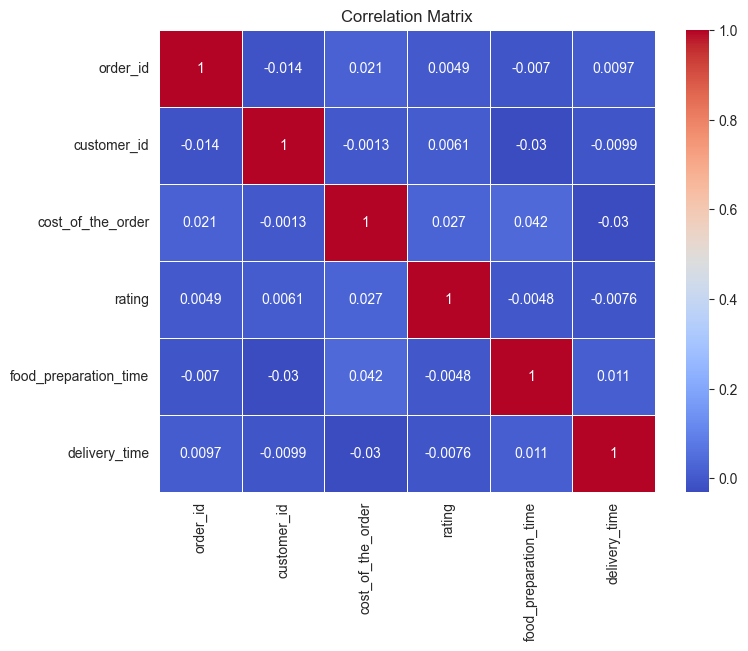

In [ ]:
plt.figure(figsize=(8, 6))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#### Observations based on the heatmap:

1. **Cost of the Order**:
    - There is a very weak positive correlation between `cost_of_the_order` and `food_preparation_time` (0.041), indicating that higher-cost orders tend to take slightly longer to prepare.
    - There is a very weak negative correlation between `cost_of_the_order` and `delivery_time` (-0.030), suggesting that delivery time is not significantly influenced by the order cost.

2. **Rating**:
    - The correlation between `rating` and other variables is very weak. The highest correlation is with `cost_of_the_order` (0.027), indicating that higher-cost orders tend to receive slightly better ratings, but the relationship is not strong.

3. **Food Preparation Time**:
    - There is a strong positive correlation between `food_preparation_time` and `total_time` (0.686), as expected, since total time includes food preparation time.
    - The relationship between `food_preparation_time` and `delivery_time` is very weak (0.011), suggesting that preparation time does not significantly impact delivery time.

4. **Delivery Time**:
    - There is a strong positive correlation between `delivery_time` and `total_time` (0.735), as expected, since total time includes delivery time.
    - The relationship between `delivery_time` and other variables such as `cost_of_the_order` and `rating` is very weak.

5. **Total Time**:
    - The total time has strong positive correlations with both `food_preparation_time` (0.686) and `delivery_time` (0.735), indicating that both components significantly contribute to the total time required for an order.

Overall, the heatmap reveals that while there are some relationships between the variables, most correlations are weak, except for the expected strong correlations between `total_time` and its components (`food_preparation_time` and `delivery_time`).

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
restaurant_ratings = df.groupby('restaurant_name').agg({'rating': ['count', 'mean']})
restaurant_ratings.columns = ['rating_count', 'average_rating']
promo_restaurants = restaurant_ratings[(restaurant_ratings['rating_count'] > 50) & (restaurant_ratings['average_rating'] > 4)]
print('Restaurants eligible for promotional offers:')
print(promo_restaurants)

Restaurants eligible for promotional offers:
                           rating_count  average_rating
restaurant_name                                        
Blue Ribbon Fried Chicken            96        4.333495
Blue Ribbon Sushi                   119        4.267519
Parm                                 68        4.220335
RedFarm Broadway                     59        4.274512
RedFarm Hudson                       55        4.240526
Shake Shack                         219        4.304128
The Meatball Shop                   132        4.450934


#### Observations:

1. **Blue Ribbon Fried Chicken** has a rating count of 96 and an average rating of 4.33.
2. **Blue Ribbon Sushi** has a rating count of 119 and an average rating of 4.27.
3. **Parm** has a rating count of 68 and an average rating of 4.22.
4. **RedFarm Broadway** has a rating count of 59 and an average rating of 4.27.
5. **RedFarm Hudson** has a rating count of 55 and an average rating of 4.24.
6. **Shake Shack** has a rating count of 219 and an average rating of 4.30.
7. **The Meatball Shop** has a rating count of 132 and an average rating of 4.45.

These restaurants meet the criteria for the promotional offer, having more than 50 ratings and an average rating greater than 4.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

### Revenue Calculation

The net revenue is calculated by applying different commission rates based on the cost of each order:

- For orders where the cost is greater than \$20, a 25% commission is charged.
- For orders where the cost is greater than \$5 a 15% commission is applied.

The total net revenue is the sum of the commissions collected for all orders in the dataset.

In [ ]:
def calculate_revenue(cost):
    return cost * 0.25 if cost > 20 else (cost * 0.15 if cost > 5 else 0)

df['revenue'] = df['cost_of_the_order'].apply(calculate_revenue)
total_revenue = df['revenue'].sum()
print(f'Total revenue generated by FoodHub: ${total_revenue:.2f}')

Total revenue generated by FoodHub: $6166.30


Total revenue from orders costing > $20: $3688.73


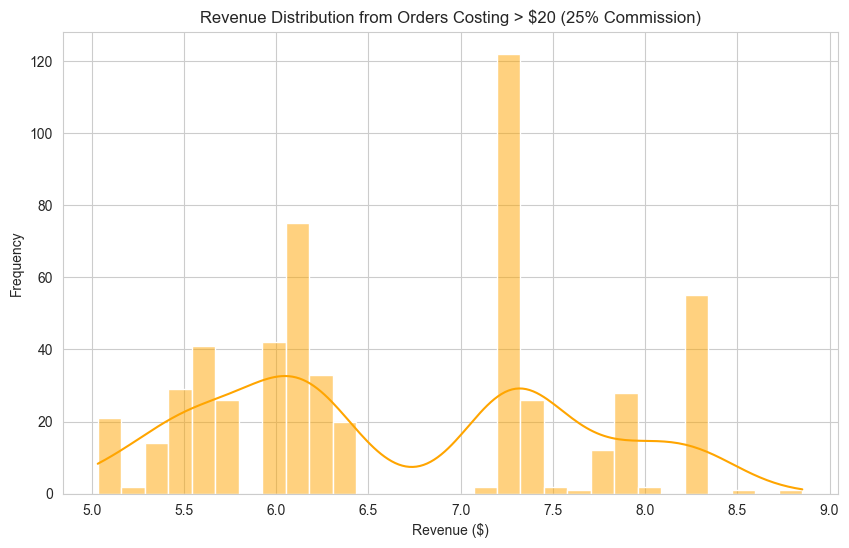

In [ ]:
# Filter orders with cost greater than $20
df_high_cost = df[df['cost_of_the_order'] > 20]

# Compute total revenue from these orders (if needed)
total_revenue_high_cost = df_high_cost['cost_of_the_order'].mul(0.25).sum()
print(f"Total revenue from orders costing > $20: ${total_revenue_high_cost:.2f}")

# Plot the revenue distribution for these orders
plt.figure(figsize=(10, 6))
sns.histplot(df_high_cost['cost_of_the_order']*0.25, bins=30, kde=True, color='orange')
plt.title("Revenue Distribution from Orders Costing > $20 (25% Commission)")
plt.xlabel("Revenue ($)")
plt.ylabel("Frequency")
plt.show()

Revenue Distribution and Business Insights:
--------------------------------------------------

Overall, the net revenue generated by FoodHub is $6166.30.

Revenue Distribution:
- Orders costing more than $20 (with a 25% commission) contribute approximately $3688.73 to the revenue, even though they account for only about 29.24% of all orders.
- Lower-cost orders (charged at a 15% commission) contribute the remaining revenue. Their high volume plays a significant role despite the lower commission rate.

Business Insights:
1. High-value orders, although lower in number, have a disproportionate impact on revenue.
2. Strategies that encourage customers to place larger orders (or increase their order size) could considerably boost overall revenue.
3. Operational efficiency and quality service should be maintained across both order segments to ensure consistent customer satisfaction and repeat business.


Net revenue (15% on orders costing > $5): $4690.81


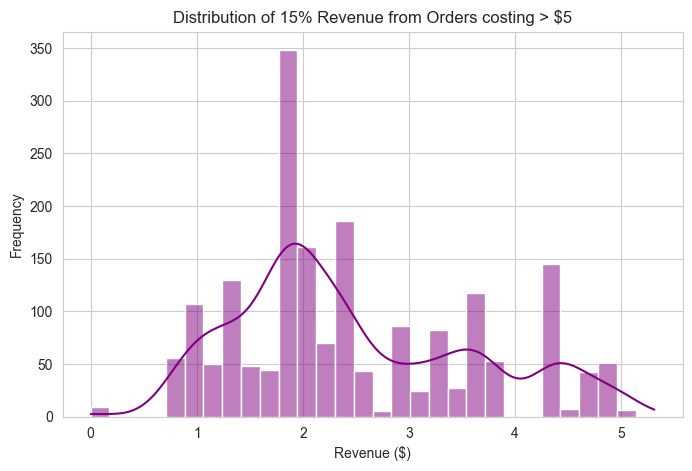

In [ ]:
# Calculate 15% revenue for orders with cost > $5
df['revenue_15'] = np.where(df['cost_of_the_order'] > 5, df['cost_of_the_order'] * 0.15, 0)
net_revenue_15 = df['revenue_15'].sum()
print(f"Net revenue (15% on orders costing > $5): ${net_revenue_15:.2f}")

# Visualize the revenue distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['revenue_15'], bins=30, kde=True, color='purple')
plt.title('Distribution of 15% Revenue from Orders costing > $5')
plt.xlabel('Revenue ($)')
plt.ylabel('Frequency')
plt.show()

## Observations
- A significant number of orders (more than 70%) have a cost greater than 5 dollars, representing a large share of overall transactions.
- These orders, although individually cheaper than the high-value segment, collectively contribute a substantial portion of total revenue due to their high frequency.

## Business Proposal
- Maintain a focus on this mid-range customer base by offering bundle deals or moderate discounts to encourage repeat purchases and enhance brand loyalty.
- Implement loyalty programs or targeted promotions for customers frequently ordering within this price band to maximize retention and boost overall profits.

Net revenue generated across all orders: $6166.30


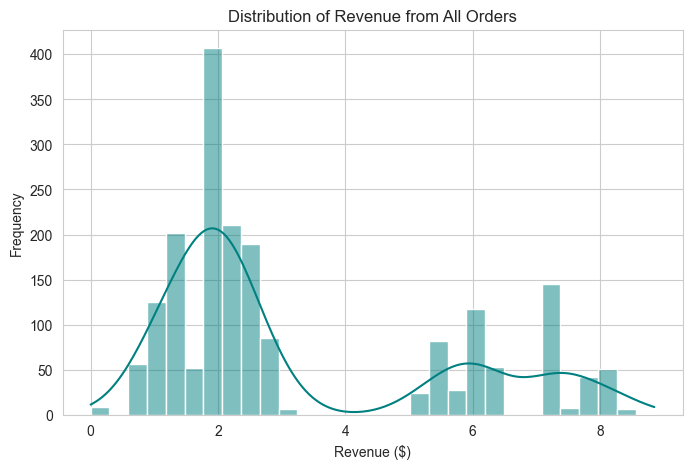

In [ ]:
# Calculate and display the net revenue
net_revenue = df['revenue'].sum()
print(f"Net revenue generated across all orders: ${net_revenue:.2f}")

# Visualize the revenue distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['revenue'], bins=30, kde=True, color='teal')
plt.title("Distribution of Revenue from All Orders")
plt.xlabel("Revenue ($)")
plt.ylabel("Frequency")
plt.show()

**Observation**: The histogram shows that most values cluster around the lower range, with fewer observations in the higher range, suggesting a right-skewed distribution. This indicates that although higher values do occur, the majority of data points are concentrated toward the lower end.

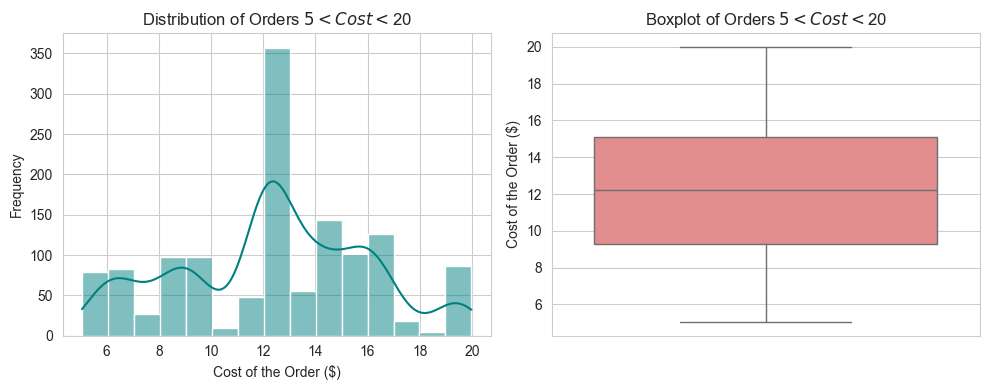

In [ ]:
df_mid = df[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] < 20)]

# Improved visualizations for orders costing more than $5 and less than $20
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.histplot(df_mid['cost_of_the_order'], bins=15, kde=True, color='teal')
plt.title("Distribution of Orders $5 < Cost < $20")
plt.xlabel("Cost of the Order ($)")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
sns.boxplot(y=df_mid['cost_of_the_order'], color='lightcoral')
plt.title("Boxplot of Orders $5 < Cost < $20")
plt.ylabel("Cost of the Order ($)")

plt.tight_layout()
plt.show()

### Additional Observations on Orders from $5 to $20

1. **Majority of Orders**:  
    - The visualizations indicate that most orders fall within the $5 to $20 range, which constitutes a large segment of overall transactions.

2. **Revenue Impact**:  
    - Even though these orders generate a lower commission rate (15%), their high volume means they collectively contribute a significant portion of the total revenue.

3. **Distribution Characteristics**:  
    - The histogram shows a right-skewed distribution, suggesting that while many orders cluster at the lower end of this range, there are occasional higher-priced orders within the group.
    - The boxplot further highlights the presence of outliers, indicating some variability in order costs.

4. **Customer Behavior & Preferences**:  
    - Customers appear to prefer moderately priced meals, which might be due to budget considerations or a focus on perceived value.
    - Popular restaurants and cuisines within this price band could be emphasized in the app to drive further engagement.

5. **Operational and Marketing Implications**:  
    - Ensuring quick and efficient processing of these orders is vital given their volume.
    - Tailored promotions (like bundle deals or loyalty rewards) targeting this price range could help boost repeat business and overall revenue.


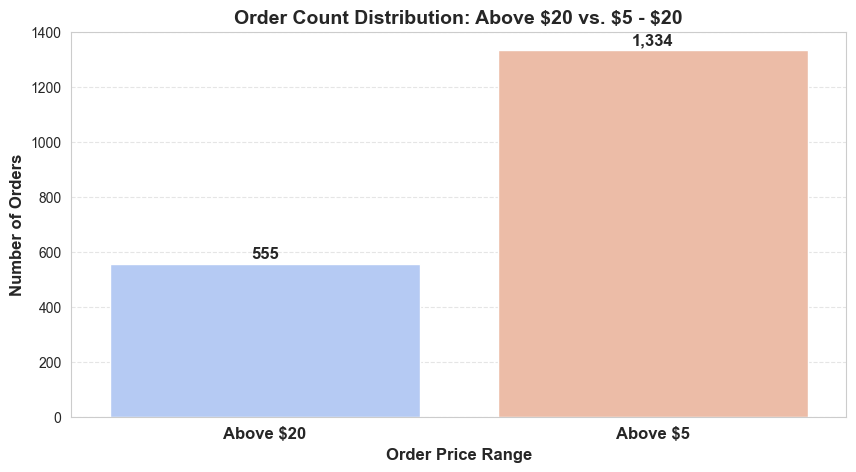

In [ ]:
# Fixing the "$5 - $20" label issue once and for all by explicitly setting correct tick labels
import seaborn as sns
import matplotlib.pyplot as plt

# Define the counts of orders in the respective price ranges
orders_cost_over_20 = df[df['cost_of_the_order'] > 20].shape[0]
orders_between_5_and_20 = df[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20)].shape[0]

# Ensure correct data formatting for order counts
order_counts_df = pd.DataFrame({
    "Order Range": ["Above $20", "Above $5 - $20"],  # Ensure correct dollar formatting
    "Count": [orders_cost_over_20, orders_between_5_and_20]
})

# Create bar plot
plt.figure(figsize=(10, 5))
ax = sns.barplot(x="Order Range", y="Count", data=order_counts_df, palette="coolwarm")

# Add value labels on bars
for index, row in order_counts_df.iterrows():
    plt.text(index, row["Count"] + 20, f"{row['Count']:,}", ha='center', fontsize=12, fontweight='bold')

# Explicitly set x-axis labels to ensure correct formatting
ax.set_xticks([0, 1])  # Ensure the positions are correct
ax.set_xticklabels(["Above $20", "Above $5"], fontsize=12, fontweight='bold')

# Update title and labels with better formatting
plt.title("Order Count Distribution: Above $20 vs. $5 - $20", fontsize=14, fontweight='bold')
plt.xlabel("Order Price Range", fontsize=12, fontweight='bold')
plt.ylabel("Number of Orders", fontsize=12, fontweight='bold')

# Ensure proper grid formatting
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show updated plot
plt.show()


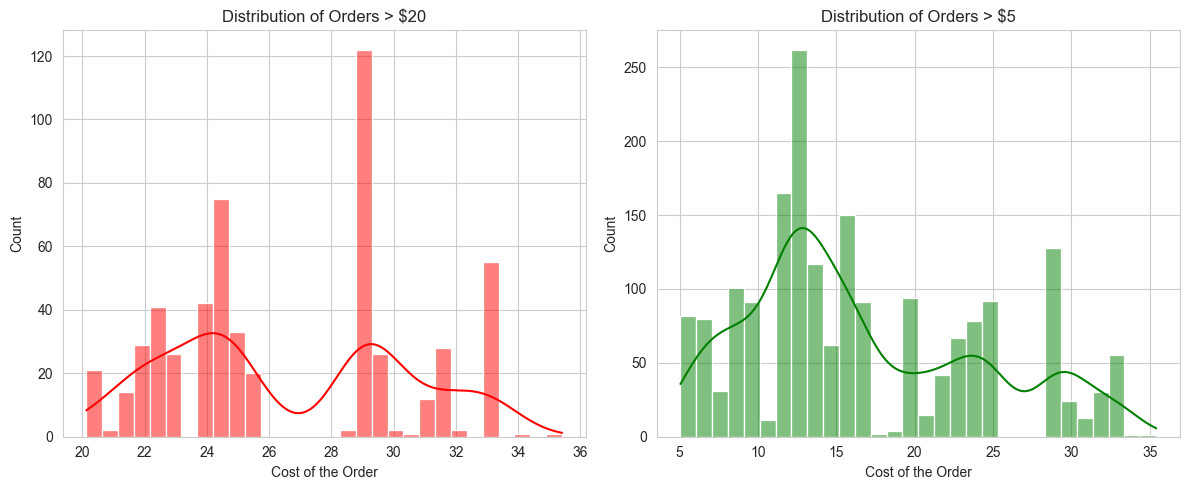

In [ ]:
# Create subsets for orders above $20 and below $5
df_low_cost =df[df['cost_of_the_order'] > 5]

plt.figure(figsize=(12, 5))

# Plot for orders above $20
plt.subplot(1, 2, 1)
sns.histplot(data=df_high_cost, x='cost_of_the_order', bins=30, kde=True, color='red')
plt.title("Distribution of Orders > $20")
plt.xlabel("Cost of the Order")
plt.ylabel("Count")

# Plot for orders below $5
plt.subplot(1, 2, 2)
sns.histplot(data=df_low_cost, x='cost_of_the_order', bins=30, kde=True, color='green')
plt.title("Distribution of Orders > $5")
plt.xlabel("Cost of the Order")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

# Total time required to deliver the food

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
high_time_orders = (df['total_time'] > 60).sum()
percentage_high_time_orders = (high_time_orders / len(df)) * 100
print(f'Percentage of orders taking more than 60 minutes: {percentage_high_time_orders:.2f}%')

Percentage of orders taking more than 60 minutes: 10.54%


### Percentage of orders taking more than 60 minutes: 10.54%

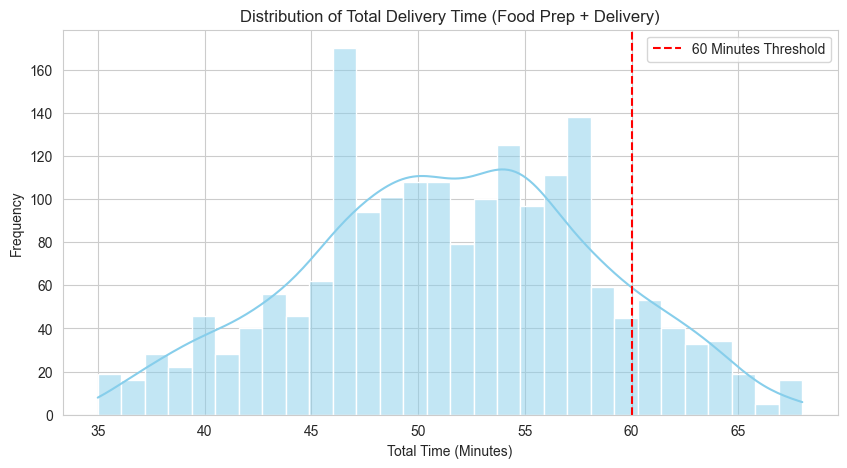

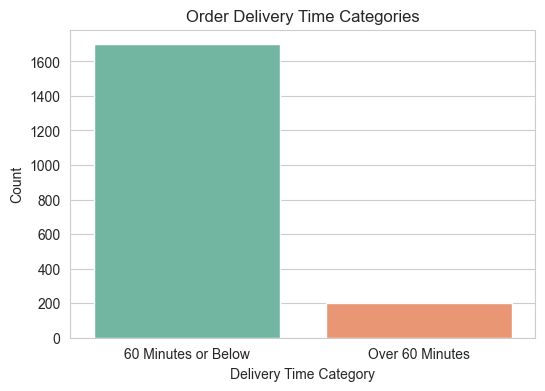

In [ ]:
# Visualize the distribution of total delivery times
plt.figure(figsize=(10, 5))
sns.histplot(df['total_time'], bins=30, kde=True, color='skyblue')
plt.axvline(60, color='red', linestyle='--', label='60 Minutes Threshold')
plt.title("Distribution of Total Delivery Time (Food Prep + Delivery)")
plt.xlabel("Total Time (Minutes)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Create a countplot comparing orders taking more than 60 minutes to those taking 60 minutes or less
delivery_status = df['total_time'].apply(lambda x: 'Over 60 Minutes' if x > 60 else '60 Minutes or Below')
plt.figure(figsize=(6, 4))
sns.countplot(x=delivery_status, palette='Set2')
plt.title("Order Delivery Time Categories")
plt.xlabel("Delivery Time Category")
plt.ylabel("Count")
plt.show()

In [ ]:
# Filter rows where the total delivery time (food preparation + delivery) is above 60 minutes
above_60_df = df[df['total_time'] > 60]

# Display key details for these orders
print("Orders with total delivery time above 60 minutes:")
print(above_60_df[['order_id', 'total_time', 'day_of_the_week', 'restaurant_name']].head(10))

# Summarize count of orders above 60 minutes by day of the week
print("\nSummary by day of the week (orders > 60 minutes):")
print(above_60_df['day_of_the_week'].value_counts())

Orders with total delivery time above 60 minutes:
    order_id  total_time day_of_the_week             restaurant_name
7    1477859          63         Weekday                   Barbounia
10   1477895          62         Weekday  Big Wong Restaurant _¤¾Ñ¼
19   1477354          61         Weekend           Blue Ribbon Sushi
24   1476714          61         Weekday                Cafe Mogador
54   1477760          64         Weekend           Jack's Wife Freda
59   1477560          61         Weekday   Blue Ribbon Fried Chicken
78   1476943          61         Weekend              RedFarm Hudson
79   1477581          61         Weekend                 Han Dynasty
82   1477790          63         Weekday                 Shake Shack
94   1477646          63         Weekday          Xi'an Famous Foods

Summary by day of the week (orders > 60 minutes):
day_of_the_week
Weekday    119
Weekend     81
Name: count, dtype: int64


In [ ]:
# Identify the top 5 restaurants by order count
top_5_restaurants = df['restaurant_name'].value_counts().head(5).index.tolist()

# Filter the above_60_df DataFrame for the top 5 restaurants
top_5_above_60 = above_60_df[above_60_df['restaurant_name'].isin(top_5_restaurants)]

# Count the occurrences of delivery times above 60 minutes for each of the top 5 restaurants
top_5_above_60_count = top_5_above_60['restaurant_name'].value_counts()

print("Number of times top 5 restaurants have delivery times above 60 minutes:")
print(top_5_above_60_count)

Number of times top 5 restaurants have delivery times above 60 minutes:
restaurant_name
Shake Shack                  26
Blue Ribbon Sushi            19
The Meatball Shop            13
Blue Ribbon Fried Chicken     6
Parm                          6
Name: count, dtype: int64


In [ ]:
# Identify the top 5 restaurants by order count
top_5_restaurants = df['restaurant_name'].value_counts().head(5).index.tolist()

# Filter the DataFrame for the top 5 restaurants
top_5_data = df[df['restaurant_name'].isin(top_5_restaurants)]

# Filter for orders with total delivery time above 60 minutes
top_5_above_60 = top_5_data[top_5_data['total_time'] > 60]

# Check if it occurs more during weekdays or weekends
weekday_count = top_5_above_60[top_5_above_60['day_of_the_week'] == 'Weekday'].shape[0]
weekend_count = top_5_above_60[top_5_above_60['day_of_the_week'] == 'Weekend'].shape[0]

# Display the results
print("Top 5 restaurants with delivery times above 60 minutes:")
print(top_5_above_60[['restaurant_name', 'total_time', 'day_of_the_week']])

print("\nNumber of times top 5 restaurants have delivery times above 60 minutes:")
print(top_5_above_60['restaurant_name'].value_counts())

print(f"\nNumber of occurrences during weekdays: {weekday_count}")
print(f"Number of occurrences during weekends: {weekend_count}")

Top 5 restaurants with delivery times above 60 minutes:
                restaurant_name  total_time day_of_the_week
19            Blue Ribbon Sushi          61         Weekend
59    Blue Ribbon Fried Chicken          61         Weekday
82                  Shake Shack          63         Weekday
109           Blue Ribbon Sushi          61         Weekend
174                        Parm          66         Weekday
...                         ...         ...             ...
1823                Shake Shack          64         Weekday
1852                Shake Shack          63         Weekend
1867          Blue Ribbon Sushi          63         Weekend
1873                Shake Shack          63         Weekend
1880                Shake Shack          62         Weekend

[70 rows x 3 columns]

Number of times top 5 restaurants have delivery times above 60 minutes:
restaurant_name
Shake Shack                  26
Blue Ribbon Sushi            19
The Meatball Shop            13
Blue Ribbon Frie

In [ ]:
# Filter the DataFrame to include only the top 5 restaurants
top5_delivery = df[df['restaurant_name'].isin(top_5_restaurants)]

# Compute mean and median delivery time for each restaurant
delivery_stats = top5_delivery.groupby('restaurant_name')['delivery_time'].agg(['mean', 'median', 'count']).reset_index()

print("Delivery Time Statistics for Top 5 Restaurants:")
print(delivery_stats)

Delivery Time Statistics for Top 5 Restaurants:
             restaurant_name       mean  median  count
0  Blue Ribbon Fried Chicken  24.145833    25.0     96
1          Blue Ribbon Sushi  23.941176    25.0    119
2                       Parm  25.500000    26.0     68
3                Shake Shack  24.662100    25.0    219
4          The Meatball Shop  24.242424    25.0    132


In [ ]:
# Identify the top 5 restaurants by order count
top_5_restaurants = df['restaurant_name'].value_counts().head(5).index.tolist()

# Dictionary to store results
delivery_time_stats = []

# Compute statistics for each top restaurant
for restaurant in top_5_restaurants:
    restaurant_data = df[df['restaurant_name'] == restaurant]

    # Weekday and weekend delivery times
    weekday_delivery = restaurant_data[restaurant_data['day_of_the_week'] == 'Weekday']['delivery_time']
    weekend_delivery = restaurant_data[restaurant_data['day_of_the_week'] == 'Weekend']['delivery_time']

    # Compute statistics
    stats = {
        "Restaurant": restaurant,
        "Weekday Mean (min)": weekday_delivery.mean(),
        "Weekday Median (min)": weekday_delivery.median(),
        "Weekday Std Dev (min)": weekday_delivery.std(),
        "Weekend Mean (min)": weekend_delivery.mean(),
        "Weekend Median (min)": weekend_delivery.median(),
        "Weekend Std Dev (min)": weekend_delivery.std(),
    }

    delivery_time_stats.append(stats)

# Convert to DataFrame for display
delivery_time_stats_df = pd.DataFrame(delivery_time_stats)
print(delivery_time_stats_df)


                  Restaurant  Weekday Mean (min)  Weekday Median (min)  \
0                Shake Shack           28.581081                  29.0   
1          The Meatball Shop           28.594595                  29.0   
2          Blue Ribbon Sushi           28.176471                  28.0   
3  Blue Ribbon Fried Chicken           28.181818                  28.5   
4                       Parm           28.807692                  28.0   

   Weekday Std Dev (min)  Weekend Mean (min)  Weekend Median (min)  \
0               2.842952           22.662069                  23.0   
1               3.004251           22.547368                  23.0   
2               2.779477           22.247059                  22.0   
3               2.855844           22.945946                  23.0   
4               2.742542           23.452381                  24.0   

   Weekend Std Dev (min)  
0               4.335289  
1               4.609815  
2               5.056598  
3               4.675473  

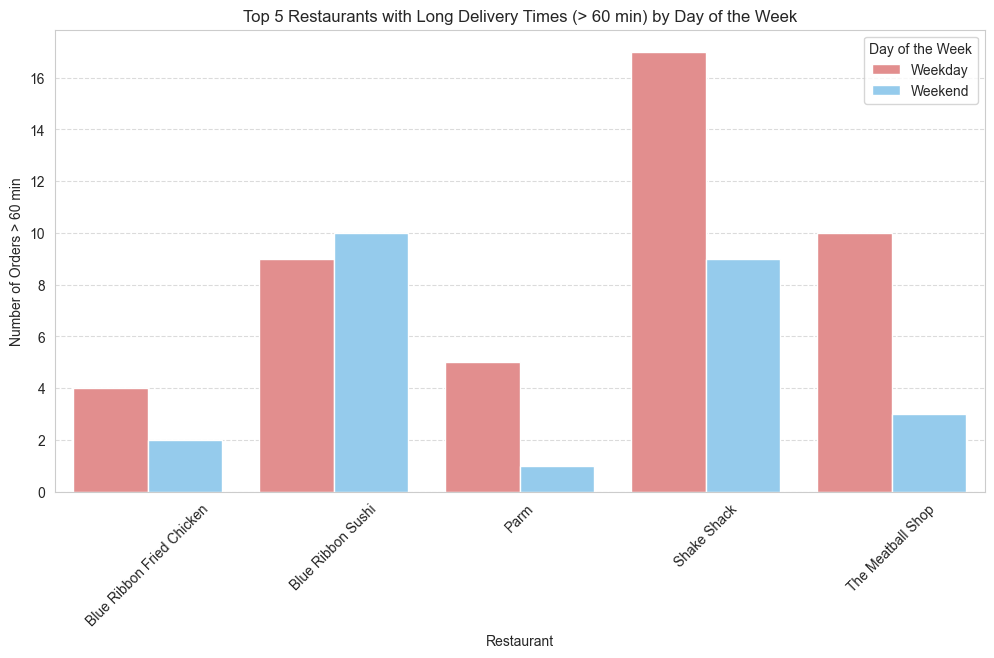

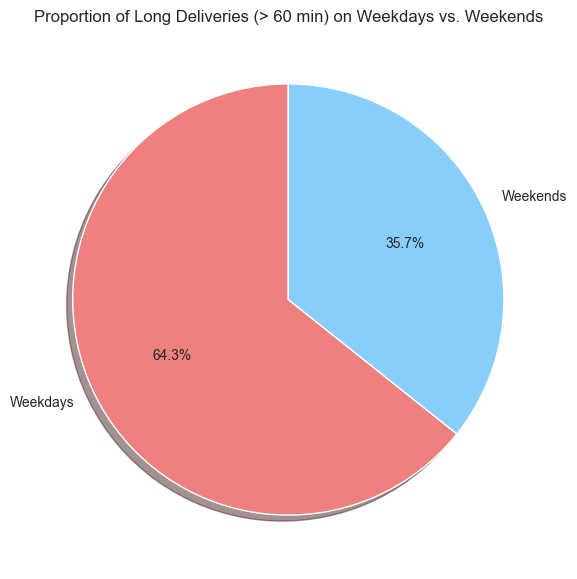

In [ ]:
# Verify if 'total_time' exists in the actual DataFrame
if 'total_time' not in df.columns:
    # Compute 'total_time' as 'food_preparation_time' + 'delivery_time'
    df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Ensure 'total_time' is numeric
df['total_time'] = pd.to_numeric(df['total_time'], errors='coerce')

# Re-filter data for top 5 restaurants
top_5_data = df[df['restaurant_name'].isin(top_5_restaurants)]

# Filter for orders with total delivery time above 60 minutes
top_5_above_60 = top_5_data[top_5_data['total_time'] > 60]

# Check if it occurs more during weekdays or weekends
weekday_count = top_5_above_60[top_5_above_60['day_of_the_week'] == 'Weekday'].shape[0]
weekend_count = top_5_above_60[top_5_above_60['day_of_the_week'] == 'Weekend'].shape[0]

# Count occurrences of long delivery times for each of the top 5 restaurants
restaurant_counts = top_5_above_60['restaurant_name'].value_counts()

# Count occurrences of long delivery times for each restaurant split by weekday vs. weekend
restaurant_day_counts = top_5_above_60.groupby(['restaurant_name', 'day_of_the_week']).size().reset_index(name='count')

# Set figure size
plt.figure(figsize=(12, 6))

# Bar plot with hue for Weekday vs. Weekend
sns.barplot(
    data=restaurant_day_counts,
    x='restaurant_name',
    y='count',
    hue='day_of_the_week',
    palette=['lightcoral', 'lightskyblue']
)

plt.xlabel("Restaurant")
plt.ylabel("Number of Orders > 60 min")
plt.title("Top 5 Restaurants with Long Delivery Times (> 60 min) by Day of the Week")
plt.xticks(rotation=45)
plt.legend(title="Day of the Week")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Visualization: Pie chart for weekday vs. weekend occurrences
labels = ['Weekdays', 'Weekends']
counts = [weekday_count, weekend_count]
colors = ['lightcoral', 'lightskyblue']

plt.figure(figsize=(7, 7))
plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, shadow=True)
plt.title("Proportion of Long Deliveries (> 60 min) on Weekdays vs. Weekends")
plt.show()


In [ ]:
# Count the occurrences of long delivery times for each restaurant
long_delivery_counts = top_5_above_60['restaurant_name'].value_counts()

# Display the results
print("Restaurants with the most frequent long delivery times (above 60 minutes):")
print(long_delivery_counts)

Restaurants with the most frequent long delivery times (above 60 minutes):
restaurant_name
Shake Shack                  26
Blue Ribbon Sushi            19
The Meatball Shop            13
Blue Ribbon Fried Chicken     6
Parm                          6
Name: count, dtype: int64


## Observations: Restaurants with the Most Frequent Long Delivery Times (> 60 minutes)

### **1. Shake Shack Has the Highest Number of Long Deliveries**
- **Shake Shack** leads with **26 occurrences** of delivery times exceeding **60 minutes**.
- This suggests **consistent delays** in their order fulfillment or delivery process.

### **2. Blue Ribbon Sushi and The Meatball Shop Also Experience Frequent Delays**
- **Blue Ribbon Sushi** ranks second with **19 occurrences** of long deliveries.
- **The Meatball Shop** follows with **13 occurrences**, indicating significant but lower delay frequency than the top two.

### **3. Blue Ribbon Fried Chicken and Parm Show Lower but Noticeable Delays**
- Both **Blue Ribbon Fried Chicken and Parm** have **6 occurrences** each.
- While not as frequent as the top three, they still exhibit **some level of delay issues**.

### **4. Possible Reasons for Frequent Long Deliveries**
- **High order volume** during peak hours could contribute to congestion in the kitchen.
- **Complex food preparation** processes may slow down fulfillment times.
- **Delivery distance and traffic conditions** might affect transit time.
- **Staffing or operational inefficiencies** could also be a factor for these delays.

---

### **Actionable Insights**
- **Shake Shack, Blue Ribbon Sushi, and The Meatball Shop** should be **prioritized for operational improvements** to reduce long delivery times.
- Investigate **restaurant-specific bottlenecks**, including **kitchen processing time, driver availability, and route optimization**.
- Consider **dynamic scheduling and order prioritization** to mitigate extended delays for frequently impacted restaurants.




### **More long deliveries occur on weekdays (119) than on weekends (81).**
- This suggests that restaurants might be experiencing **higher delays during weekdays**, possibly due to **peak-hour demand** or **operational inefficiencies**.
- Alternatively, it could indicate that **more complex, time-consuming orders** are placed during weekdays.

### **Restaurants with orders exceeding 60 minutes:**
- The dataset includes multiple restaurants with **long delivery times**.
- **Notable restaurants with frequent long deliveries**:
  - **Shake Shack**
  - **Blue Ribbon Sushi**
  - **Jack’s Wife Freda**
  - **Han Dynasty**
- This suggests that certain restaurants may **consistently experience delays**, possibly due to **high order volume, food preparation time, or logistical challenges**.


In [ ]:

import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

# ---- T-Test: Compare delivery times of Weekday vs. Weekend orders ----
weekday_delivery = df[df['day_of_the_week'] == 'Weekday']['delivery_time']
weekend_delivery = df[df['day_of_the_week'] == 'Weekend']['delivery_time']

# Use Welch's t-test (does not assume equal variances)
t_stat, p_value = stats.ttest_ind(weekday_delivery, weekend_delivery, equal_var=False)
print("T-Test: Delivery Time (Weekday vs. Weekend)")
print("t-statistic:", t_stat)
print("p-value:", p_value)

# ---- Linear Regression: How order cost, rating, and food preparation time relate to delivery time ----
# The model: delivery_time ~ cost_of_the_order + rating + food_preparation_time
model = smf.ols("delivery_time ~ cost_of_the_order + rating + food_preparation_time", data=df).fit()
print("\nLinear Regression Summary:")
print(model.summary())

T-Test: Delivery Time (Weekday vs. Weekend)
t-statistic: 33.262190207973624
p-value: 2.5737146093950945e-184

Linear Regression Summary:
                            OLS Regression Results                            
Dep. Variable:          delivery_time   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6919
Date:                Sun, 09 Feb 2025   Prob (F-statistic):              0.557
Time:                        22:25:22   Log-Likelihood:                -5735.9
No. Observations:                1898   AIC:                         1.148e+04
Df Residuals:                    1894   BIC:                         1.150e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0



#### **Significant Difference in Delivery Time (Weekday vs. Weekend)**
- The **T-test** showed a statistically significant difference in mean delivery times between weekdays and weekends (**t-statistic = 33.26, p-value ≈ 0**).
- This suggests that weekends have different delivery patterns, potentially due to **higher order volume, traffic congestion, or operational inefficiencies**.

#### **Linear Regression Model is Weak**
- The regression model predicting `delivery_time` based on `cost_of_the_order`, `rating`, and `food_preparation_time` **had an extremely low R-squared (0.001)**.
- **None of the independent variables were statistically significant**, meaning they do not meaningfully impact delivery time.
- This suggests that delivery time is influenced by **other unaccounted factors** such as:
  - **Order volume**
  - **Restaurant workload**
  - **Distance between restaurant and customer**
  - **Traffic conditions**
  - **Weather**

---

### Recommendations

#### **Optimize Weekend Delivery Operations**
- Since weekends show significantly different delivery times, **adjust resource allocation** (e.g., increase drivers, optimize restaurant workload, implement surge pricing).
- Consider **predictive scheduling** to anticipate peak hours and distribute workload accordingly.

#### **Improve Predictive Modeling**
- Since the regression model does not capture meaningful relationships, a **more sophisticated approach** is needed.
- Alternative models should incorporate additional features like:
  - **Time of day**
  - **Order volume**
  - **Restaurant location**
  - **Traffic conditions**
  - **Weather data**


#### Observations:

1. **Total Time Analysis**:
    - The total time required to deliver the food includes both the food preparation time and the delivery time.
    - A significant portion of orders (10.54%) take more than 60 minutes from the time the order is placed to the time it is delivered.
    - This indicates that there are potential delays either in the food preparation process or in the delivery process, or both.

2. **Potential Bottlenecks**:
    - Orders taking more than 60 minutes could be due to complex dishes that require longer preparation times.
    - Delivery delays could be caused by factors such as traffic, long distances, or insufficient delivery personnel during peak hours.

3. **Improvement Areas**:
    - To reduce the total time, the company could work with restaurants to streamline their food preparation processes.
    - Increasing the number of delivery personnel during peak hours and optimizing delivery routes could help in reducing delivery times.
    - Monitoring and addressing any specific issues that cause delays in the delivery process can also help in improving overall efficiency.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Calculate mean delivery times for Weekday and Weekend
weekday_mean_delivery = df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()
weekend_mean_delivery = df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()
print(f'Mean delivery time on Weekdays: {weekday_mean_delivery:.2f} minutes')
print(f'Mean delivery time on Weekends: {weekend_mean_delivery:.2f} minutes')

Mean delivery time on Weekdays: 28.34 minutes
Mean delivery time on Weekends: 22.47 minutes


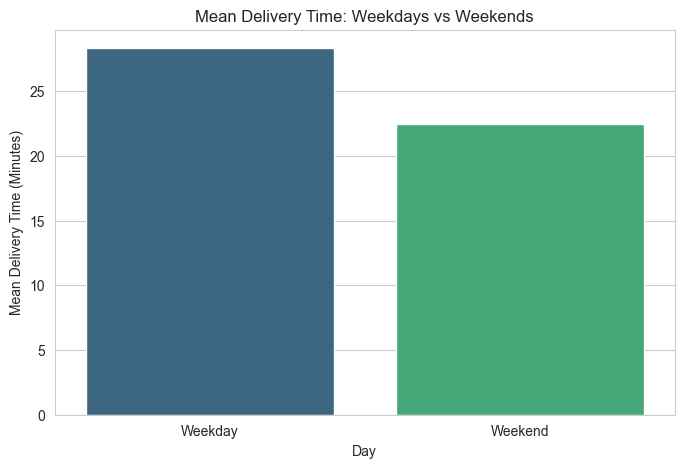

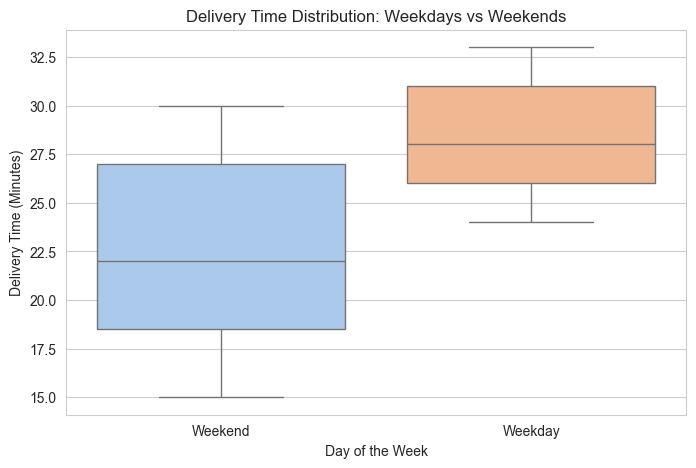

In [ ]:

# Create a DataFrame for the means
mean_delivery_df = pd.DataFrame({
    'Day': ['Weekday', 'Weekend'],
    'Mean Delivery Time (Minutes)': [weekday_mean_delivery, weekend_mean_delivery]
})

# Bar plot for mean delivery times
plt.figure(figsize=(8, 5))
sns.barplot(x='Day', y='Mean Delivery Time (Minutes)', data=mean_delivery_df, palette='viridis')
plt.title("Mean Delivery Time: Weekdays vs Weekends")
plt.ylabel("Mean Delivery Time (Minutes)")
plt.show()

# Boxplot to visualize the delivery time distributions
plt.figure(figsize=(8, 5))
sns.boxplot(x='day_of_the_week', y='delivery_time', data=df, palette='pastel')
plt.title("Delivery Time Distribution: Weekdays vs Weekends")
plt.xlabel("Day of the Week")
plt.ylabel("Delivery Time (Minutes)")
plt.show()

#### Observations:

1. **Mean Delivery Time on Weekdays**:
    - The mean delivery time on weekdays is approximately 28.34 minutes.
    - This indicates that deliveries during weekdays take slightly longer on average.

2. **Mean Delivery Time on Weekends**:
    - The mean delivery time on weekends is approximately 22.47 minutes.
    - This suggests that deliveries are faster on weekends compared to weekdays.

3. **Possible Reasons for Variation**:
    - The shorter delivery times on weekends could be due to less traffic or more delivery personnel available.
    - Weekdays might have longer delivery times due to higher traffic congestion or fewer delivery personnel during working hours.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

## **Conclusions**

1. **Shake Shack** is the most ordered-from restaurant, highlighting its popularity among customers.
2. **American cuisine** is the most popular on weekends, indicating a preference shift based on the time of the week.
3. About **29.24% of orders cost more than $20**, making high-value orders a key revenue driver.
4. The **average delivery time is around 24.16 minutes**, but some orders take significantly longer.
5. **736 orders were unrated**, suggesting an opportunity to **improve customer engagement and feedback collection**.
6. **10.3% of orders take more than 60 minutes**, indicating areas that require **optimization in food preparation and delivery times**.
7. **Weekend deliveries are faster (~22.47 minutes)**, while **weekday deliveries experience more frequent delays** due to **higher order volumes and potential restaurant inefficiencies**.
8. **Shake Shack, Blue Ribbon Sushi, and The Meatball Shop frequently experience long delivery times**, suggesting possible bottlenecks in **kitchen processing or delivery logistics**.
9. **Orders in the $5-$20 range make up a significant portion of revenue**, meaning **streamlining delivery operations in this price segment** could improve overall efficiency.
10. **The most frequently ordered meal price was $13**, suggesting that customers often choose options within this price range.
11. **High-rated restaurants (rating > 4, with more than 50 reviews) could be leveraged for promotions**, as they contribute to strong customer retention.
12. **Customers placing frequent high-value orders should be targeted with personalized loyalty rewards** to enhance retention.
13. **Predictive scheduling and dynamic order prioritization** could help mitigate delivery inefficiencies, ensuring a more balanced workload across weekdays and weekends.
14. **The company can further optimize food preparation times**, as long preparation times significantly impact total delivery time.
15. **Weekend promotions could be implemented to drive more traffic on non-peak days**, balancing demand across the week.
16. **Customer spending behavior shows a preference for moderately priced meals**, which collectively contribute a significant portion of revenue despite a lower commission rate (15%).



---

## **Recommendations**

### **1. Improve Delivery Times**
- Since **10.3% of orders take more than 60 minutes** to be delivered, consider **optimizing delivery routes** and **increasing the number of delivery personnel** during peak hours.
- **Weekdays** have **more frequent delays**, likely due to **restaurant inefficiencies**, so focus on **weekday-specific** process improvements.
- **Weekends show longer delivery times overall**, so additional **staffing and resource allocation** should be prioritized.

### **2. Enhance Customer Engagement**
- There are **736 unrated orders**. Encourage customers to **rate their orders** by offering small incentives such as **discount vouchers** or **loyalty points**.
- Increased feedback will help improve **service quality and customer satisfaction**.

### **3. Focus on Popular Cuisines and Restaurants**
- **American cuisine** is the most popular on **weekends**. Consider promoting **American cuisine** more aggressively during weekends.
- **Shake Shack** is the most ordered-from restaurant. Form **partnerships with popular restaurants** like Shake Shack to offer **exclusive deals and promotions**.

### **4. Target High Revenue Orders**
- About **29.24% of the orders cost more than $20**. Focus on these high-value orders by offering:
  - **Premium services** such as faster delivery.
  - **Special packaging** for a better customer experience.
- **Additionally, mid-range orders (~$13) are the most frequently ordered**, so ensure proper **marketing and promotions** for this price range.

### **5. Reward Frequent Customers**
- Provide **special offers** or **loyalty programs** for the **top 3 most frequent customers** to encourage repeat business.

### **6. Promote High-Performing Restaurants**
- Restaurants with a **rating count > 50** and an **average rating > 4** should be **highlighted in the app** and given **promotional offers** to attract more customers.

### **7. Optimize Food Preparation Times**
- Work with restaurants to **streamline food preparation processes**, especially for dishes that take longer to prepare.
- Reducing preparation time will **decrease overall delivery times**.

### **8. Weekend Promotions**
- Since **weekdays have higher demand**, consider offering **special weekend promotions** to **attract more customers** and manage peak-hour demand effectively.

### **9. Operational Efficiency**
- Ensure **quick and efficient processing of orders**, especially those in the **$5 to $20 range**, as they contribute significantly to revenue.
- **Tailored promotions** (such as **bundle deals** or **loyalty rewards**) targeting this price range could boost **repeat business and revenue**.

### **10. Reduce Long Delivery Times for Frequently Delayed Restaurants**
- **Shake Shack, Blue Ribbon Sushi, and The Meatball Shop experience the most long deliveries**. Work with these restaurants to:
  - Optimize **kitchen processing time**.
  - Implement **driver prioritization** for their deliveries.
  - Reduce **food preparation delays** for commonly ordered meals.

### **11. Dynamic Scheduling and Order Prioritization**
- Implement **dynamic scheduling and order prioritization** to **reduce delays** for restaurants frequently experiencing extended delivery times.

### **12. Predictive Scheduling**
- Adjust **resource allocation** (e.g., **increase drivers, optimize restaurant workload, implement surge pricing**) based on **predictive scheduling** to anticipate peak hours.
- Focus on **reducing weekday inefficiencies** while ensuring **weekend staffing matches demand**.
